In [1]:
from environment import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

[2017-03-09 18:03:31] Checking dependencies (rpy2, plotly) ...


In [2]:
mut_cna_df = ccal.read_gct('../data/ccle_mut_cna.gct')
gene_dependency_df = ccal.read_gct('../data/ccle_gene_dependency.gct')
gene_expression_df = ccal.read_gct('../data/rnaseq.v3.NO_HAEM.gct')
pathway_expression_df = ccal.read_gct('../data/ccle_pathway_expression_all.gct')
regulator_df = ccal.read_gct('../data/ccle_regulator.gct')
protein_expression_df = ccal.read_gct('../data/ccle_protein_expression.gct')
tissue_df = ccal.read_gct('../data/ccle_tissue.gct')
drug_sensitivity_df = ccal.read_gct('../data/ccle_drug_sensitivity.gct')
drug_sensitivity2_df = ccal.read_gct('../data/all.cpds.auc08.gct')

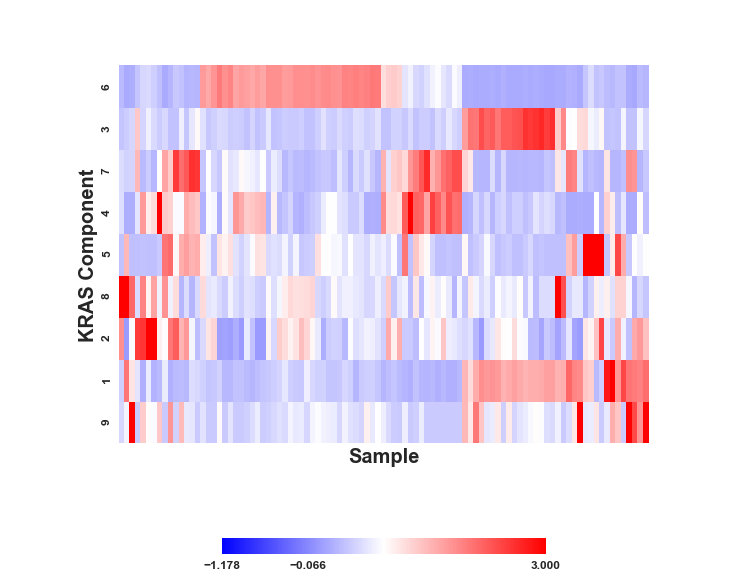

In [3]:
braf_mutants = mut_cna_df.columns[mut_cna_df.ix['BRAF_MUT', :].astype(bool)]
h_matrix = ccal.read_gct('../results/nmf/matrices/nmf_k9_h.gct')
h_matrix.index = [1, 3, 9, 8, 6, 7, 5, 2, 4]
braf_mutant_h_matrix = h_matrix.ix[:, h_matrix.columns & braf_mutants]
ccal.plot_heatmap(normalization_method='-0-', normalization_axis=1, dataframe = braf_mutant_h_matrix, cluster=True,
                  
                              xlabel = 'Sample', 
                              ylabel = 'KRAS Component', 
                              xticklabels = False)

[2017-03-09 18:03:54] Computing associations (axis=1) between matrices (0/9) ...
[2017-03-09 18:03:54] Computing associations (axis=1) between matrices (1/9) ...
[2017-03-09 18:03:54] Computing associations (axis=1) between matrices (2/9) ...
[2017-03-09 18:03:54] Computing associations (axis=1) between matrices (3/9) ...
[2017-03-09 18:03:54] Computing associations (axis=1) between matrices (4/9) ...
[2017-03-09 18:03:54] Computing associations (axis=1) between matrices (5/9) ...
[2017-03-09 18:03:54] Computing associations (axis=1) between matrices (6/9) ...
[2017-03-09 18:03:54] Computing associations (axis=1) between matrices (7/9) ...
[2017-03-09 18:03:54] Computing associations (axis=1) between matrices (8/9) ...


1         3         9         8         6         7         5  \
1  0.994839  0.801253  0.732435  0.589391 -0.753312 -0.545886 -0.534240   
3  0.801253  0.947790  0.330773 -0.361143 -0.562689 -0.376570 -0.443171   
9  0.732435  0.330773  0.981370  0.452516 -0.483094 -0.373976 -0.360161   
8  0.589391 -0.361143  0.452516  0.989692 -0.347279 -0.344664 -0.427789   
6 -0.753312 -0.562689 -0.483094 -0.347279  0.958389 -0.523332 -0.445330   
7 -0.545886 -0.376570 -0.373976 -0.344664 -0.523332  0.973028  0.411965   
5 -0.534240 -0.443171 -0.360161 -0.427789 -0.445330  0.411965  0.978456   
2 -0.500166 -0.319327  0.449977  0.517610 -0.324046 -0.204259  0.379797   
4 -0.714160 -0.463636 -0.450964 -0.369359 -0.387087  0.645631 -0.292540   

          2         4  
1 -0.500166 -0.714160  
3 -0.319327 -0.463636  
9  0.449977 -0.450964  
8  0.517610 -0.369359  
6 -0.324046 -0.387087  
7 -0.204259  0.645631  
5  0.379797 -0.292540  
2  0.987702  0.262522  
4  0.262522  0.977246

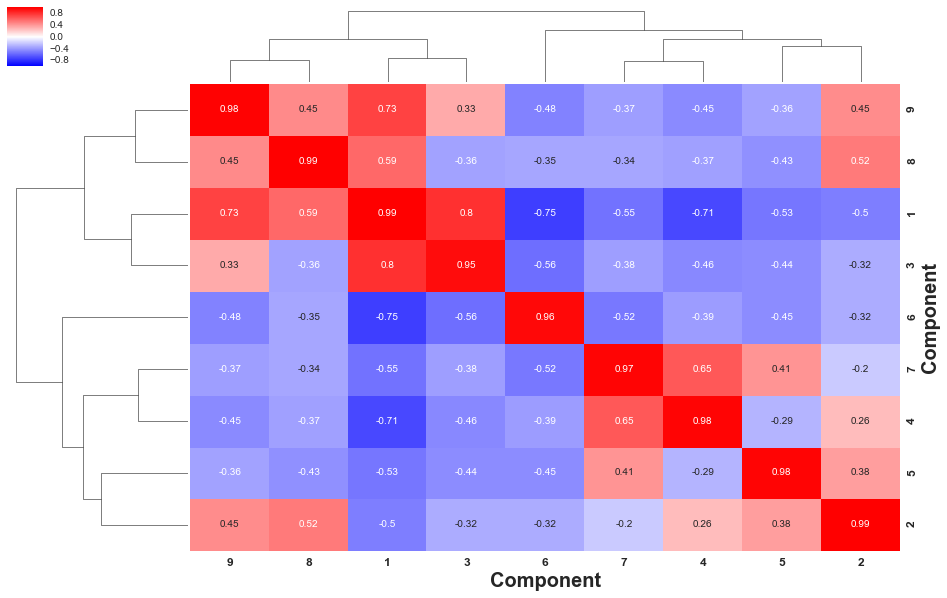

In [4]:
ccal.association.make_comparison_panel(matrix1 = braf_mutant_h_matrix, 
                                       matrix2 = braf_mutant_h_matrix,
                                       axis = 1, 
                                         matrix1_label = 'Component', 
                                         matrix2_label = 'Component')

In [5]:
braf_h_matrix = braf_mutant_h_matrix.ix[[ 7, 3, 6], :]

[2017-03-09 18:03:54] Computing distances between samples, making a distance matrix ...
[2017-03-09 18:03:54] Computing associations (axis=0) between matrices (0/97) ...
[2017-03-09 18:03:55] Computing associations (axis=0) between matrices (1/97) ...
[2017-03-09 18:03:55] Computing associations (axis=0) between matrices (2/97) ...
[2017-03-09 18:03:55] Computing associations (axis=0) between matrices (3/97) ...
[2017-03-09 18:03:55] Computing associations (axis=0) between matrices (4/97) ...
[2017-03-09 18:03:55] Computing associations (axis=0) between matrices (5/97) ...
[2017-03-09 18:03:55] Computing associations (axis=0) between matrices (6/97) ...
[2017-03-09 18:03:55] Computing associations (axis=0) between matrices (7/97) ...
[2017-03-09 18:03:56] Computing associations (axis=0) between matrices (8/97) ...
[2017-03-09 18:03:56] Computing associations (axis=0) between matrices (9/97) ...
[2017-03-09 18:03:56] Computing associations (axis=0) between matrices (10/97) ...
[2017-03-

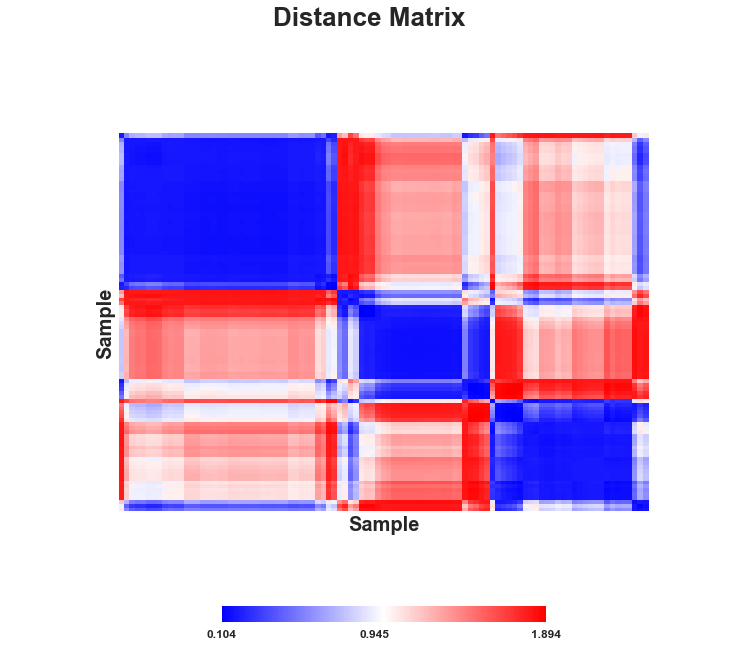

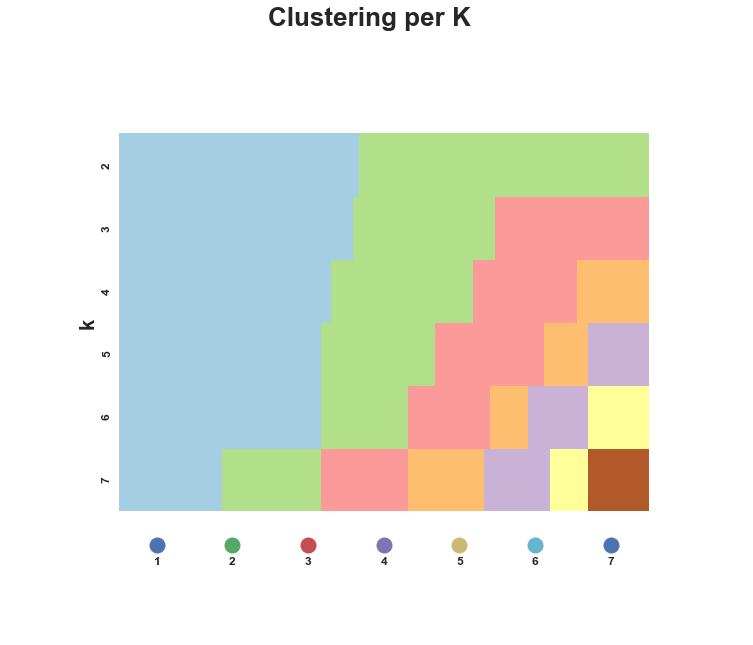

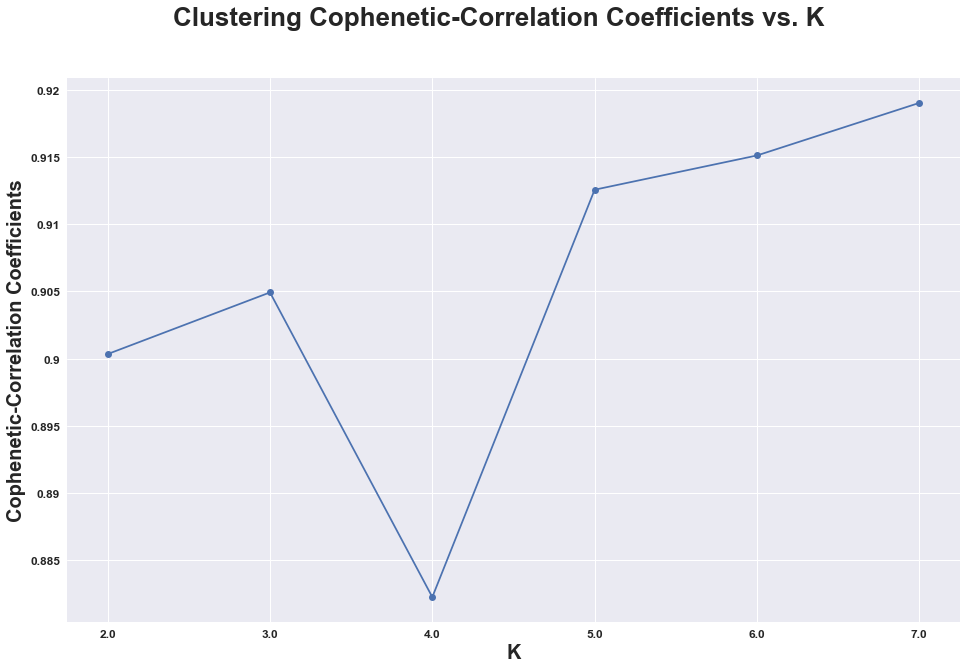

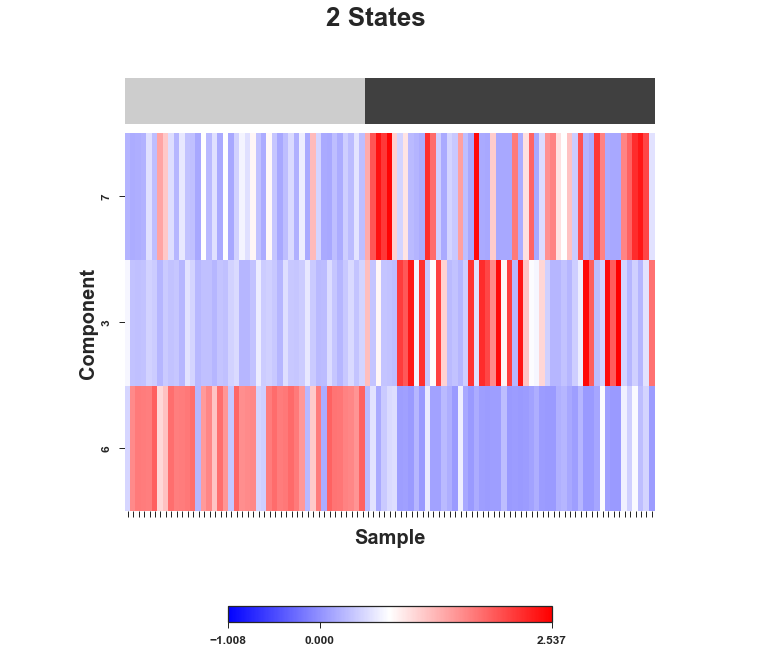

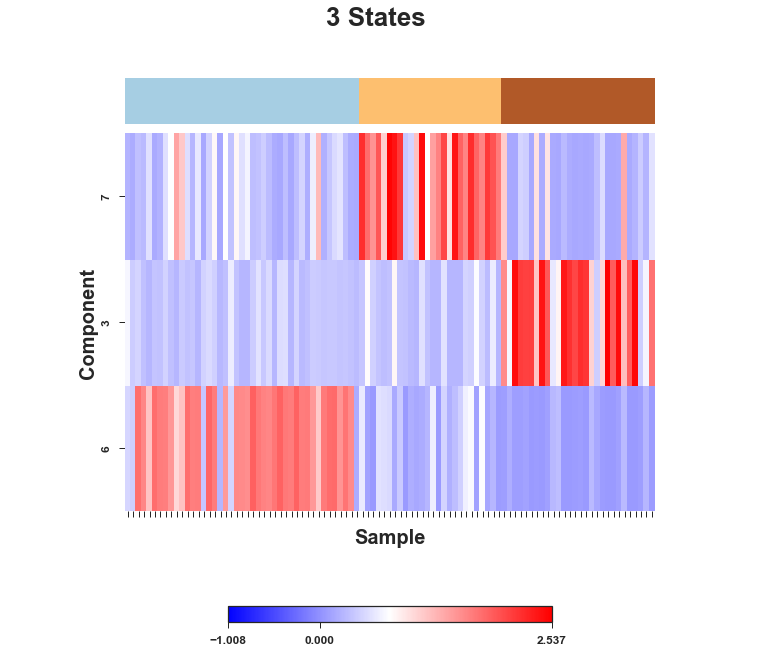

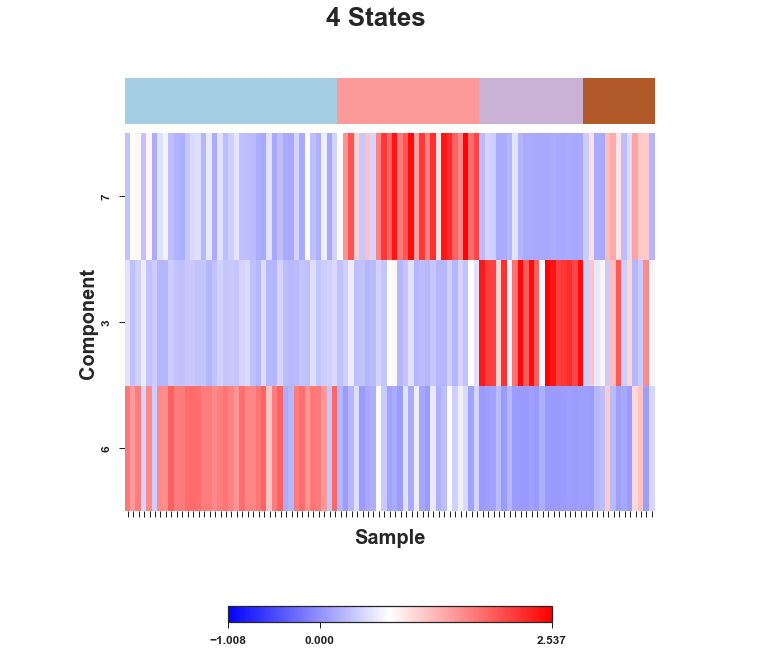

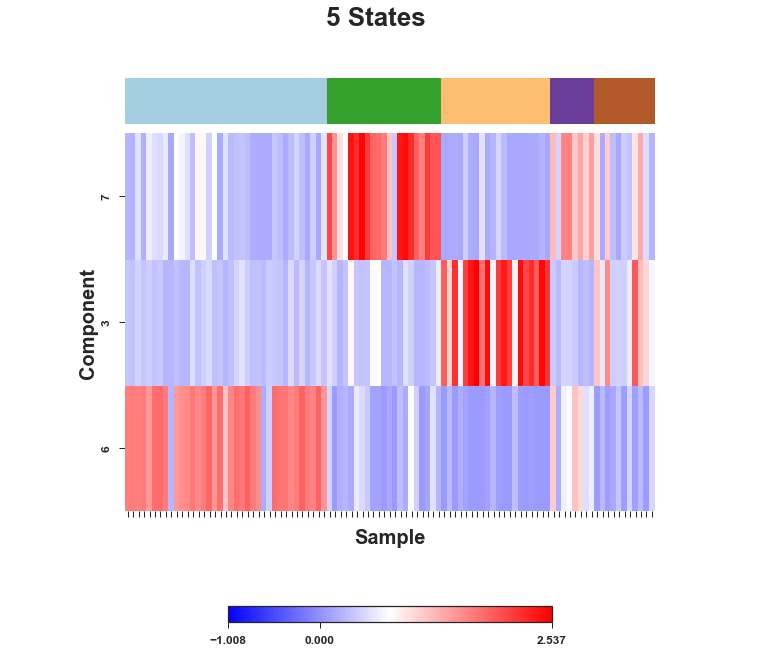

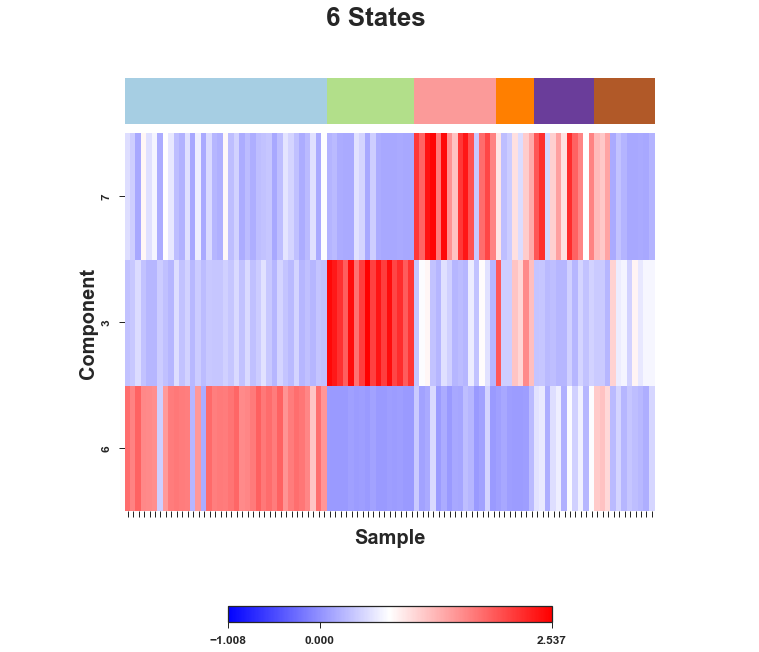

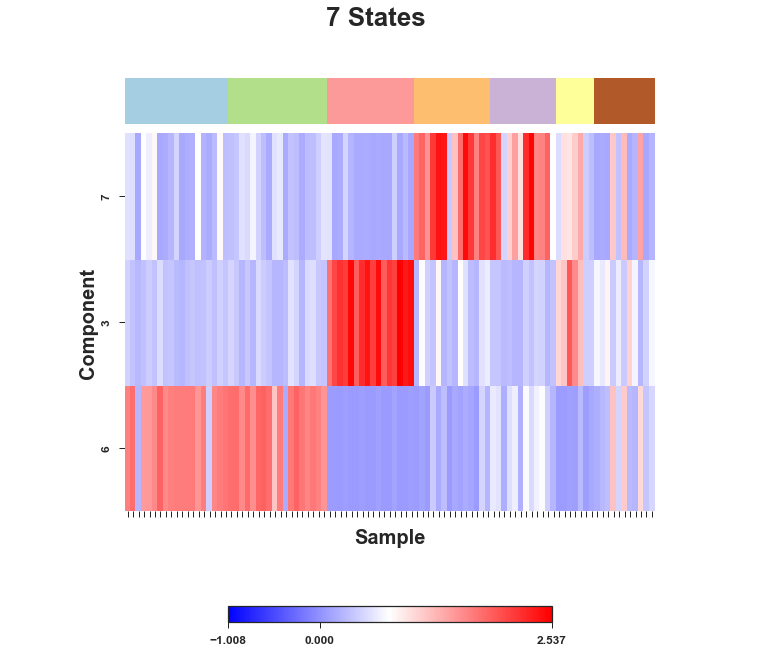

In [6]:
braf_dist_matrix, braf_clusterings, braf_cophen_coeff = ccal.oncogps.define_states(matrix = braf_h_matrix,
                                                                                                                                                       ks = range(2, 8), 
                                                                                                                                                       max_std=3, n_clusterings = 30,
                                                                                                                                                       random_seed = 12876,
                                                                                                                                                       directory_path='../results/BRAF')

In [7]:
binary_labels = ccal.support.d1.explode_series(braf_clusterings.ix[3, :])
ccal.write_gct(binary_labels, '../results/clusterings/clusterings_k3.gct')
braf_sample_labels = braf_clusterings.ix[3, :]

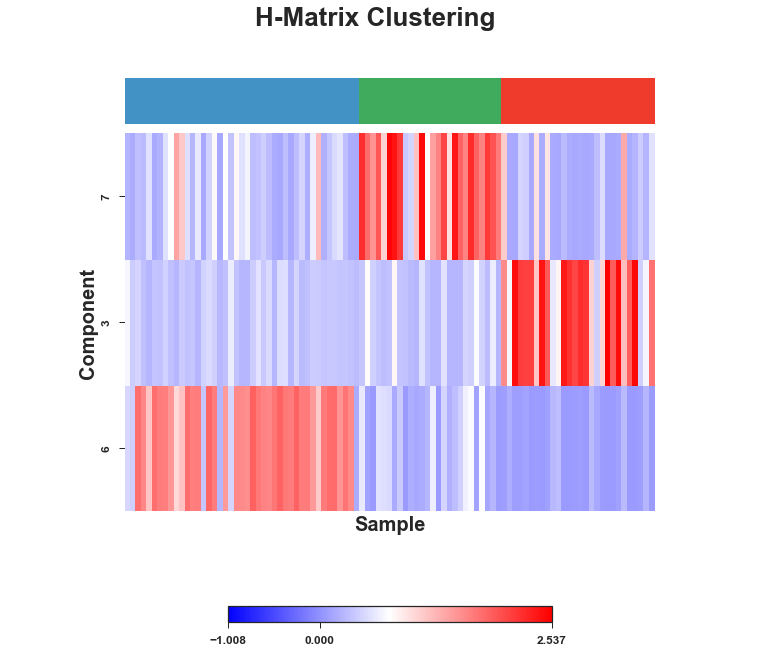

In [8]:
ccal.plot_heatmap(dataframe = braf_h_matrix, 
                                  annotation_colors = [blue, green, red],
                                  data_type = 'continuous', 
                                  normalization_method = '-0-', 
                                  normalization_axis = 1,
                                  column_annotation = braf_sample_labels,
                                  title = 'H-Matrix Clustering',
                                  xlabel = 'Sample', 
                                  ylabel = 'Component', 
                                  xticklabels = False)

[2017-03-09 18:04:22] Using equilateral-triangle component coordinates ...
[2017-03-09 18:04:22] Computing training sample coordinates using 3 components and 1.000 power ...
[2017-03-09 18:04:22] Computing state grids and probabilities ...
[2017-03-09 18:04:22] Plotting ...


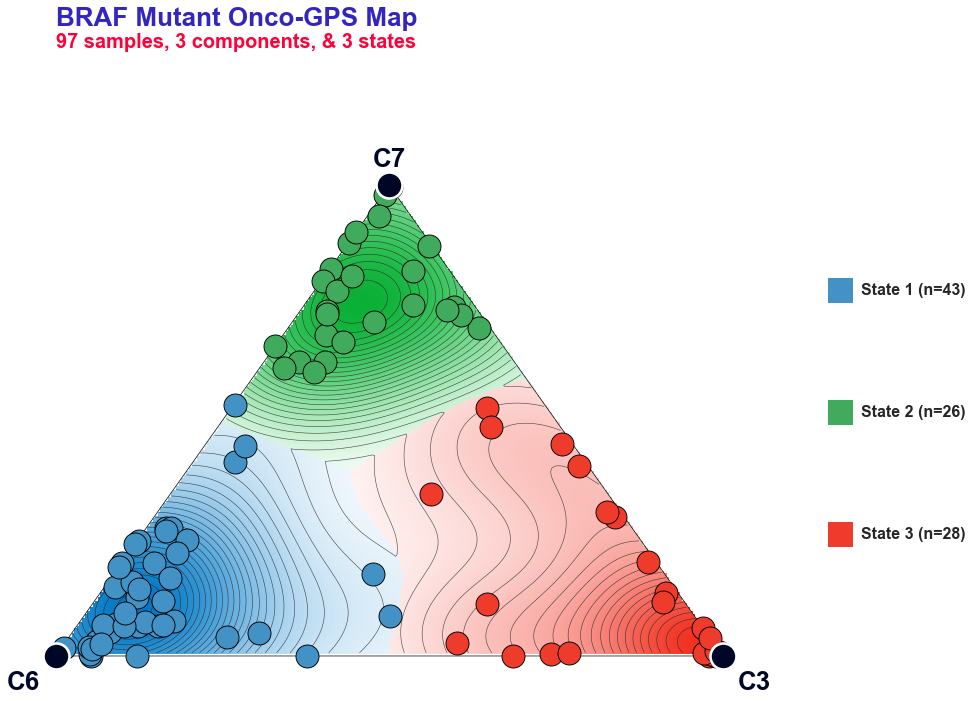

In [9]:
ccal.oncogps.make_oncogps(training_h=braf_h_matrix, 
                                                     training_states=braf_sample_labels,
                                                     title='BRAF Mutant Onco-GPS Map',
                                                     equilateral=True,
                                                     legend_markersize=25,
                                                     state_colors=[blue,green, red],
                                                     power = 1,
                                                     kde_bandwidth_factor=0.8,
                                                     component_names=["C7","C3","C6"],
                                                     std_max=2)
                                                     #filepath=join(DIR_RESULT,'KRAS_Onco-GPS.pdf'))

[2017-03-09 18:04:23] Using equilateral-triangle component coordinates ...
[2017-03-09 18:04:23] Computing training sample coordinates using 3 components and 1.000 power ...
[2017-03-09 18:04:23] Computing state grids and probabilities ...
[2017-03-09 18:04:24] Plotting ...
[2017-03-09 18:04:30] Using equilateral-triangle component coordinates ...
[2017-03-09 18:04:30] Computing training sample coordinates using 3 components and 1.000 power ...
[2017-03-09 18:04:30] Computing state grids and probabilities ...
[2017-03-09 18:04:30] Plotting ...
[2017-03-09 18:04:36] Using equilateral-triangle component coordinates ...
[2017-03-09 18:04:36] Computing training sample coordinates using 3 components and 1.000 power ...
[2017-03-09 18:04:36] Computing state grids and probabilities ...
[2017-03-09 18:04:36] Plotting ...


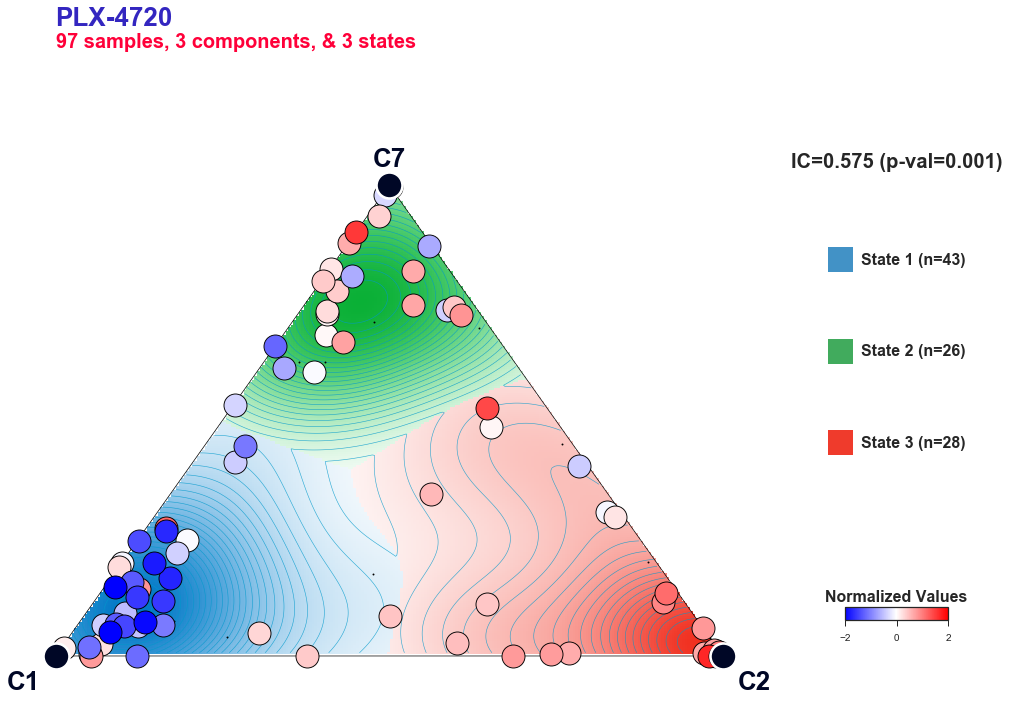

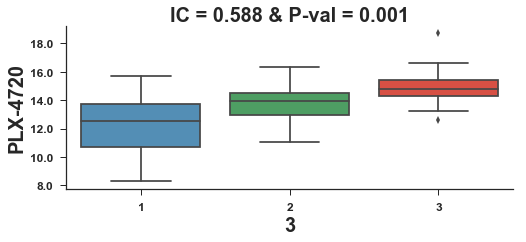

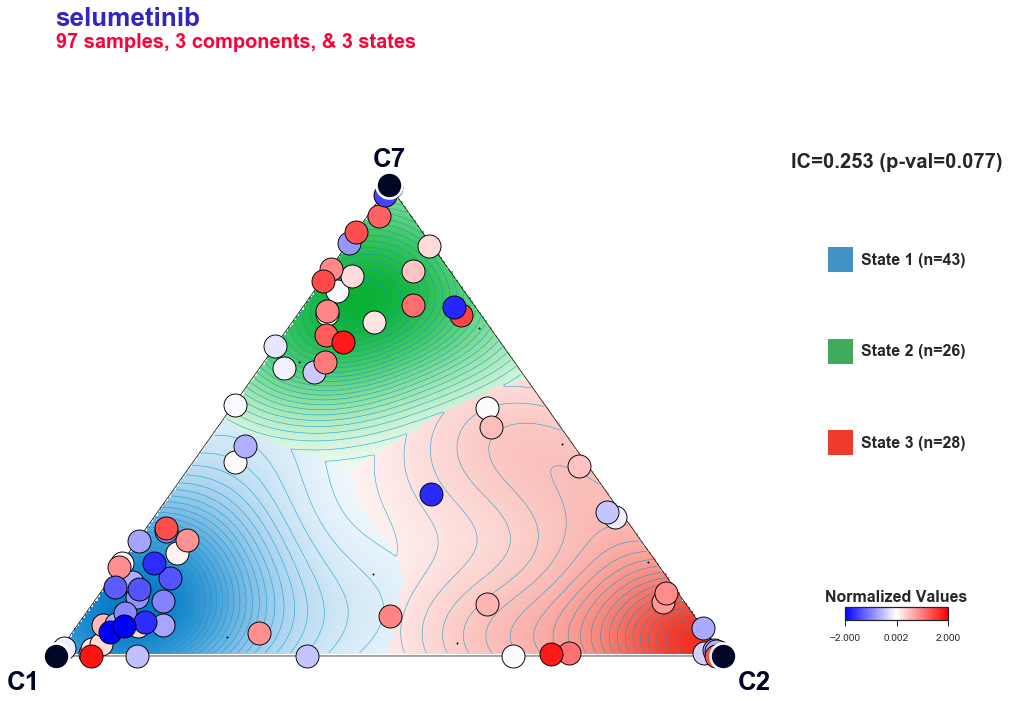

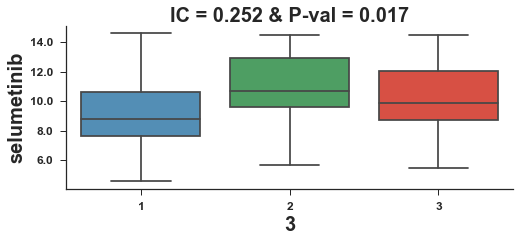

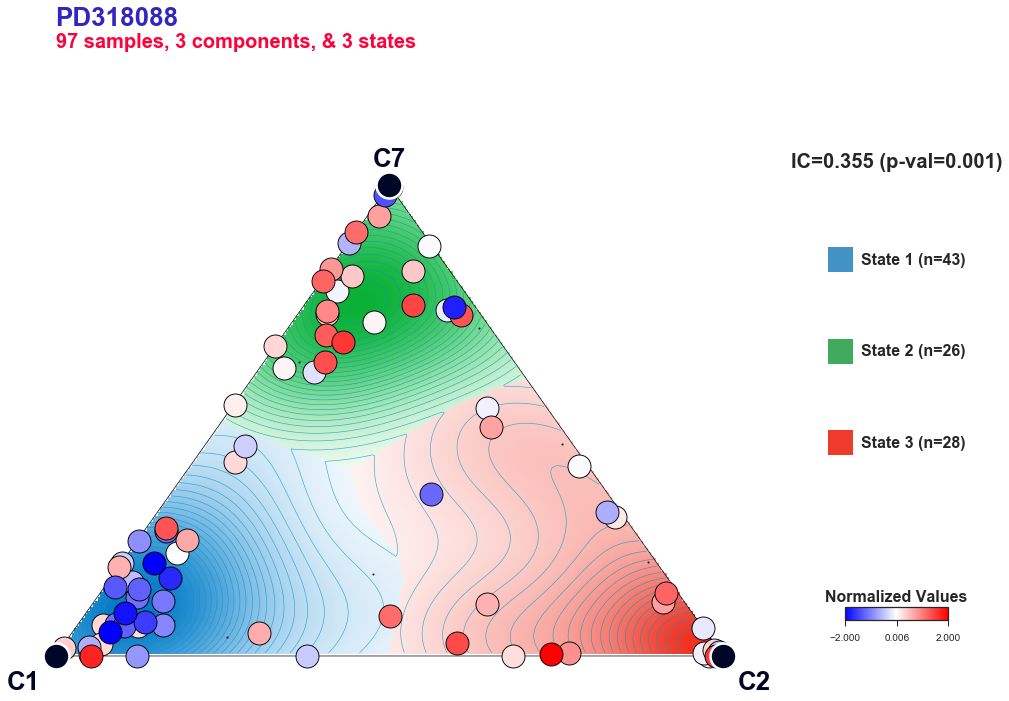

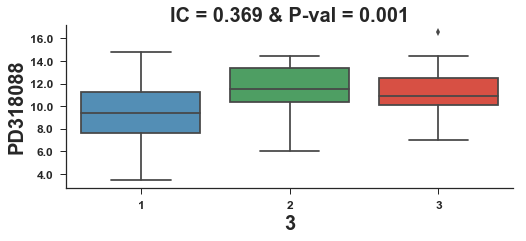

In [10]:
for i, alias in [('PLX-4720', 'PLX-4720'),
                        ('selumetinib', 'selumetinib'),
                        ('PD318088', 'PD318088')]:

    annotation = drug_sensitivity_df.ix[i, :]
    annotation.name = alias

    ccal.oncogps.make_oncogps(training_h=braf_h_matrix, 
                              training_states=braf_sample_labels, 
                              training_annotation=annotation,
                              title=annotation.name,
                              equilateral=True,
                              legend_markersize=25,
                              state_colors=[blue, green, red],
                              power = 1,
                              kde_bandwidth_factor=0.8,
                              contour_linecolor=light_blue,
                              component_names = ["C7", "C2", "C1"],
                              std_max = 2)
                              #filepath=join(DIR_RESULT, 'BRAS_Onco-GPS_Feature_{}.pdf'.format(annotation.name)))
    ccal.plot_violin_box_or_bar(braf_sample_labels, annotation.ix[braf_sample_labels.index], colors=[blue, green, red],
                                                        violin_or_box='box', figure_size=(8,3))

[2017-03-09 18:04:43] Using equilateral-triangle component coordinates ...
[2017-03-09 18:04:43] Computing training sample coordinates using 3 components and 1.000 power ...
[2017-03-09 18:04:43] Computing state grids and probabilities ...
[2017-03-09 18:04:43] Plotting ...
[2017-03-09 18:04:50] Using equilateral-triangle component coordinates ...
[2017-03-09 18:04:50] Computing training sample coordinates using 3 components and 1.000 power ...
[2017-03-09 18:04:50] Computing state grids and probabilities ...
[2017-03-09 18:04:50] Plotting ...
[2017-03-09 18:04:56] Using equilateral-triangle component coordinates ...
[2017-03-09 18:04:56] Computing training sample coordinates using 3 components and 1.000 power ...
[2017-03-09 18:04:56] Computing state grids and probabilities ...
[2017-03-09 18:04:56] Plotting ...
[2017-03-09 18:05:02] Using equilateral-triangle component coordinates ...
[2017-03-09 18:05:02] Computing training sample coordinates using 3 components and 1.000 power ...
[

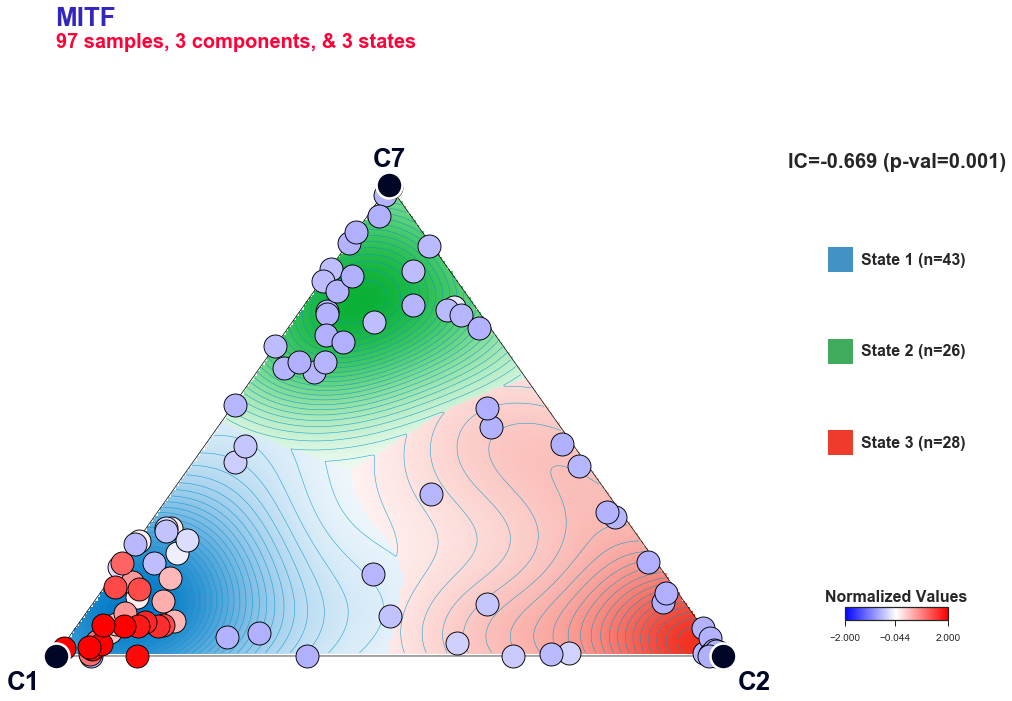

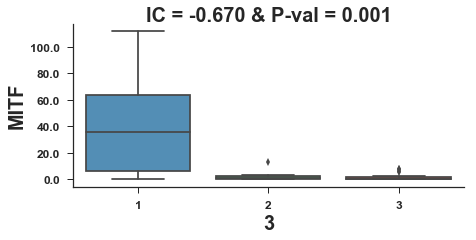

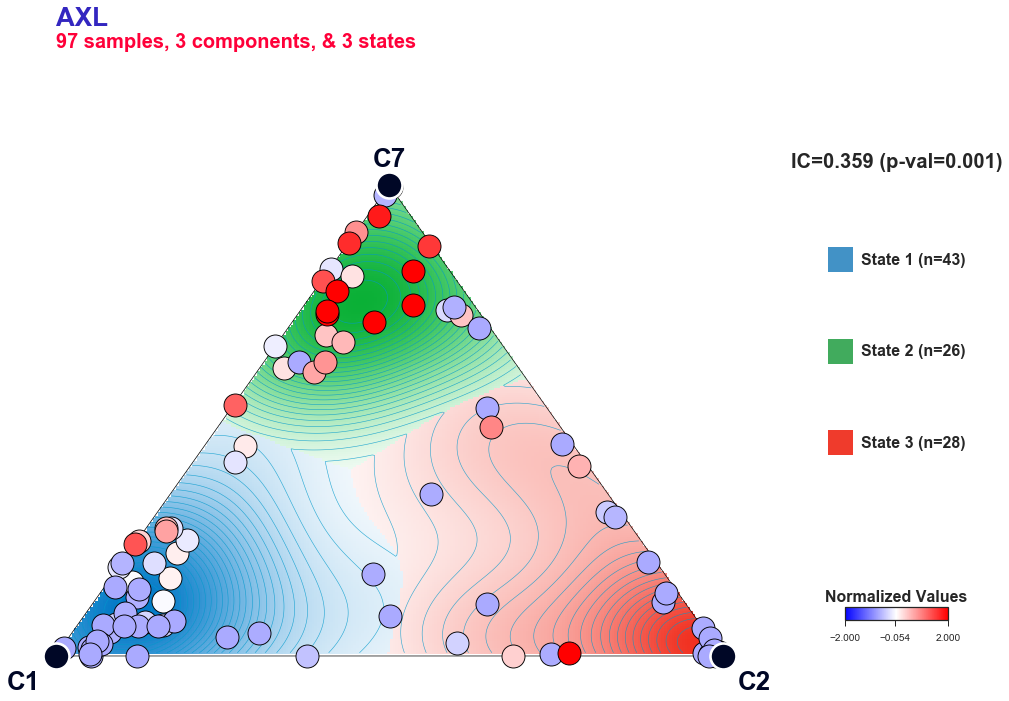

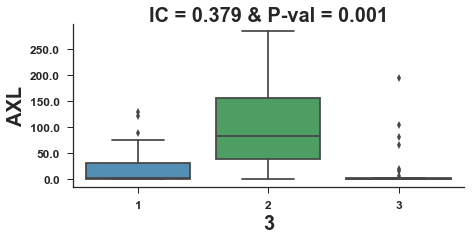

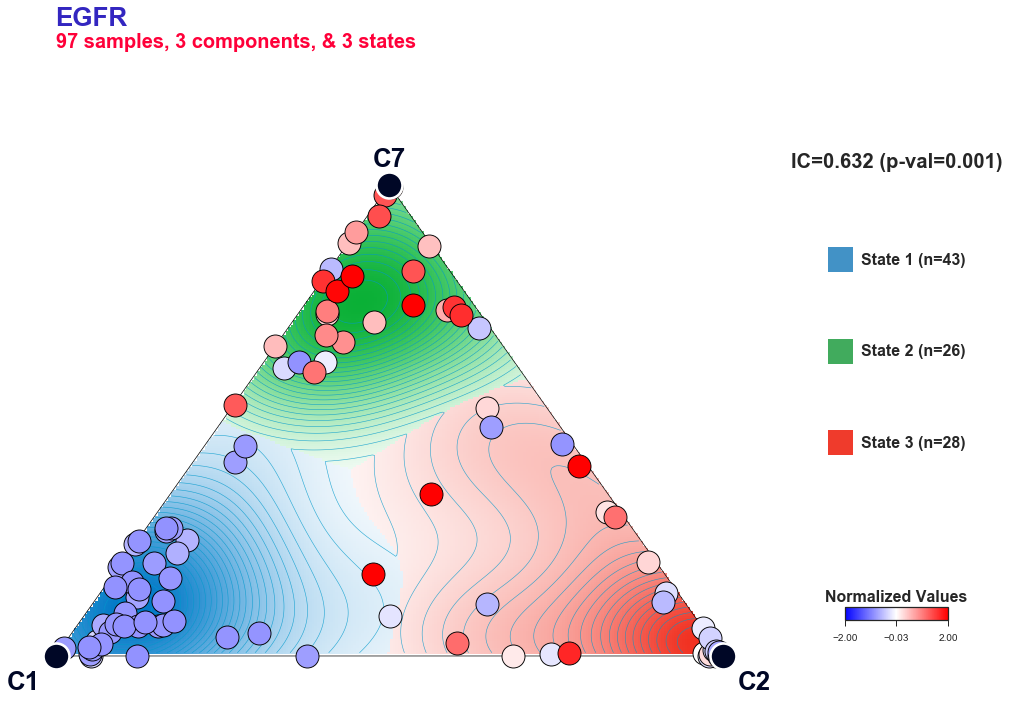

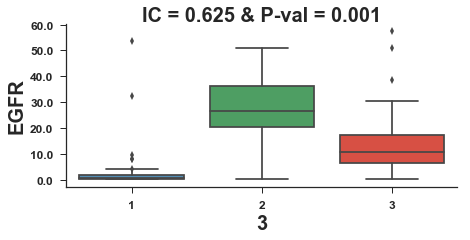

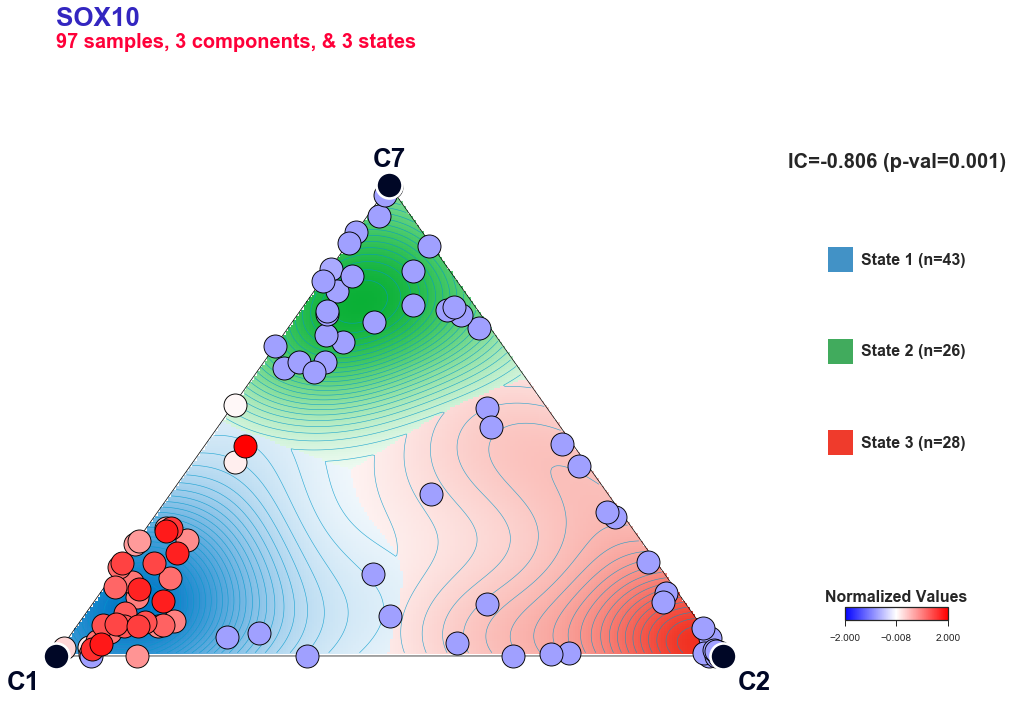

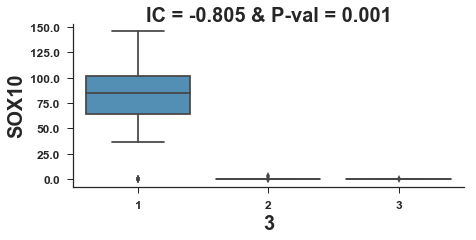

In [11]:
for i, alias in [('MITF', 'MITF'),
                        ('AXL', 'AXL'),
                        ('EGFR', 'EGFR'),               
                        ('SOX10', 'SOX10')]:

    annotation = gene_expression_df.ix[i, :]
    annotation.name = alias

    ccal.oncogps.make_oncogps(training_h=braf_h_matrix, 
                              training_states=braf_sample_labels, 
                              training_annotation=annotation,
                              title=annotation.name,
                              equilateral=True,
                              legend_markersize=25,
                              state_colors=[blue, green, red],
                              power = 1,
                              kde_bandwidth_factor=0.8,
                              contour_linecolor=light_blue,
                              component_names = ["C7", "C2", "C1"],
                              std_max = 2)
                              #filepath=join(DIR_RESULT, 'BRAS_Onco-GPS_Feature_{}.pdf'.format(annotation.name)))
        
    ccal.plot_violin_box_or_bar(braf_sample_labels, annotation.ix[braf_sample_labels.index], colors=[blue, green, red],
                                                        violin_or_box='box', figure_size=(7,3))        

[2017-03-09 18:05:11] Using equilateral-triangle component coordinates ...
[2017-03-09 18:05:11] Computing training sample coordinates using 3 components and 1.000 power ...
[2017-03-09 18:05:11] Computing state grids and probabilities ...
[2017-03-09 18:05:11] Plotting ...


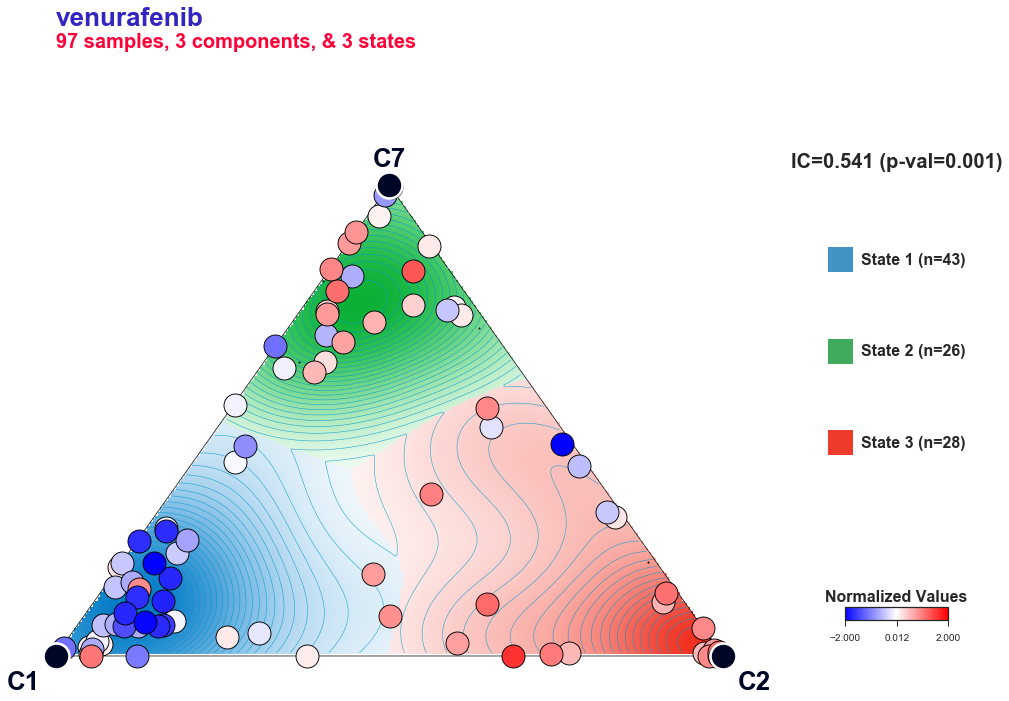

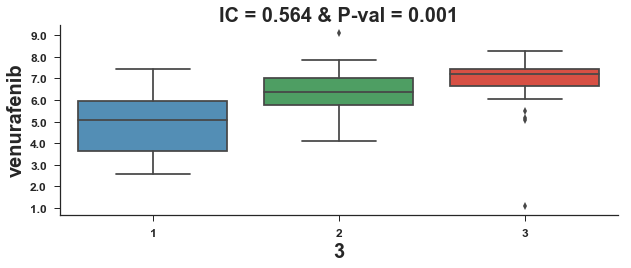

In [12]:
for i, alias in [('vemurafenib', 'venurafenib')]:

    annotation = drug_sensitivity2_df.ix[i, :]
    annotation.name = alias

    ccal.oncogps.make_oncogps(training_h=braf_h_matrix, 
                              training_states=braf_sample_labels, 
                              training_annotation=annotation,
                              title=annotation.name,
                              equilateral=True,
                              legend_markersize=25,
                              state_colors=[blue, green, red],
                              power = 1,
                              kde_bandwidth_factor=0.8,
                              contour_linecolor=light_blue,
                              component_names = ["C7", "C2", "C1"],
                              std_max = 2)
                              #filepath=join(DIR_RESULT, 'BRAS_Onco-GPS_Feature_{}.pdf'.format(annotation.name)))
        
    ccal.plot_violin_box_or_bar(braf_sample_labels, annotation.ix[braf_sample_labels.index], colors=[blue, green, red],
                                                        violin_or_box='box', figure_size=(10,3.5))

[2017-03-09 18:05:17] Using equilateral-triangle component coordinates ...
[2017-03-09 18:05:17] Computing training sample coordinates using 3 components and 1.000 power ...
[2017-03-09 18:05:17] Computing state grids and probabilities ...
[2017-03-09 18:05:17] Plotting ...


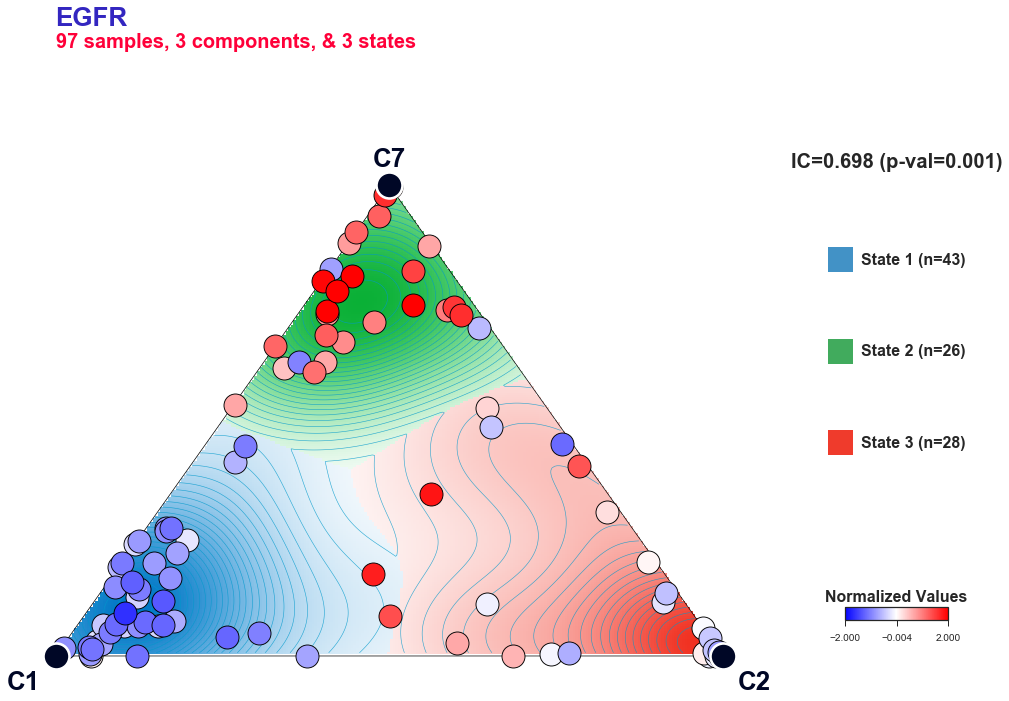

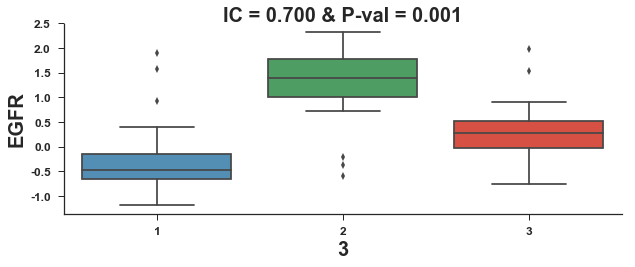

In [13]:
for i, alias in [('EGFR-R-V', 'EGFR')]:

    annotation = protein_expression_df.ix[i, :]
    annotation.name = alias

    ccal.oncogps.make_oncogps(training_h=braf_h_matrix, 
                              training_states=braf_sample_labels, 
                              training_annotation=annotation,
                              title=annotation.name,
                              equilateral=True,
                              legend_markersize=25,
                              state_colors=[blue, green, red],
                              power = 1,
                              kde_bandwidth_factor=0.8,
                              contour_linecolor=light_blue,
                              component_names = ["C7", "C2", "C1"],
                              std_max = 2)
                              #filepath=join(DIR_RESULT, 'BRAS_Onco-GPS_Feature_{}.pdf'.format(annotation.name)))
        
    ccal.plot_violin_box_or_bar(braf_sample_labels, annotation.ix[braf_sample_labels.index], colors=[blue, green, red],
                                                        violin_or_box='box', figure_size=(10,3.5))

<hr style="border: none; border-bottom: 1px solid #88BBEE;">
#### 7.3 Produce pathway-based heatmap of BRAF mutant samples

[2017-03-09 18:05:27] Computing distances between samples, making a distance matrix ...
[2017-03-09 18:05:27] Computing associations (axis=0) between matrices (0/110) ...
[2017-03-09 18:05:27] Computing associations (axis=0) between matrices (1/110) ...
[2017-03-09 18:05:27] Computing associations (axis=0) between matrices (2/110) ...
[2017-03-09 18:05:27] Computing associations (axis=0) between matrices (3/110) ...
[2017-03-09 18:05:27] Computing associations (axis=0) between matrices (4/110) ...
[2017-03-09 18:05:27] Computing associations (axis=0) between matrices (5/110) ...
[2017-03-09 18:05:27] Computing associations (axis=0) between matrices (6/110) ...
[2017-03-09 18:05:28] Computing associations (axis=0) between matrices (7/110) ...
[2017-03-09 18:05:28] Computing associations (axis=0) between matrices (8/110) ...
[2017-03-09 18:05:28] Computing associations (axis=0) between matrices (9/110) ...
[2017-03-09 18:05:28] Computing associations (axis=0) between matrices (10/110) ..

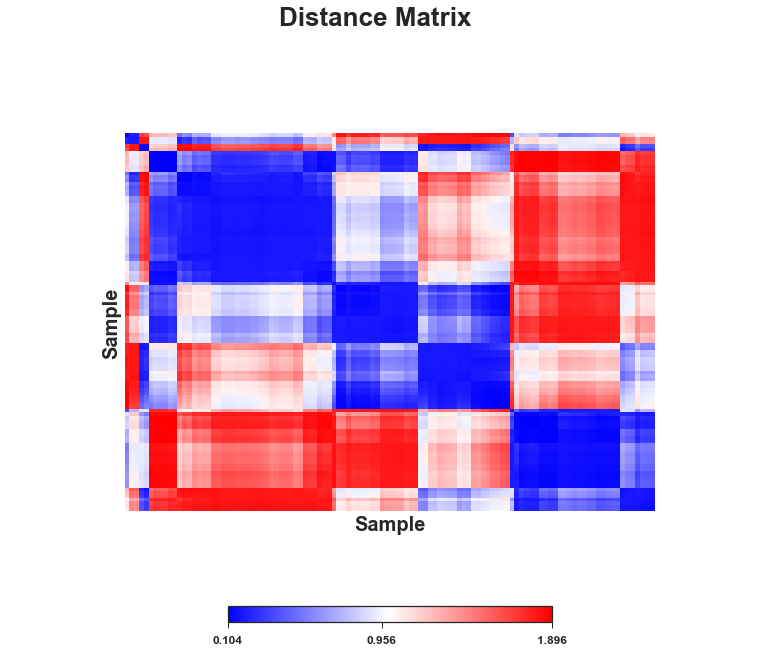

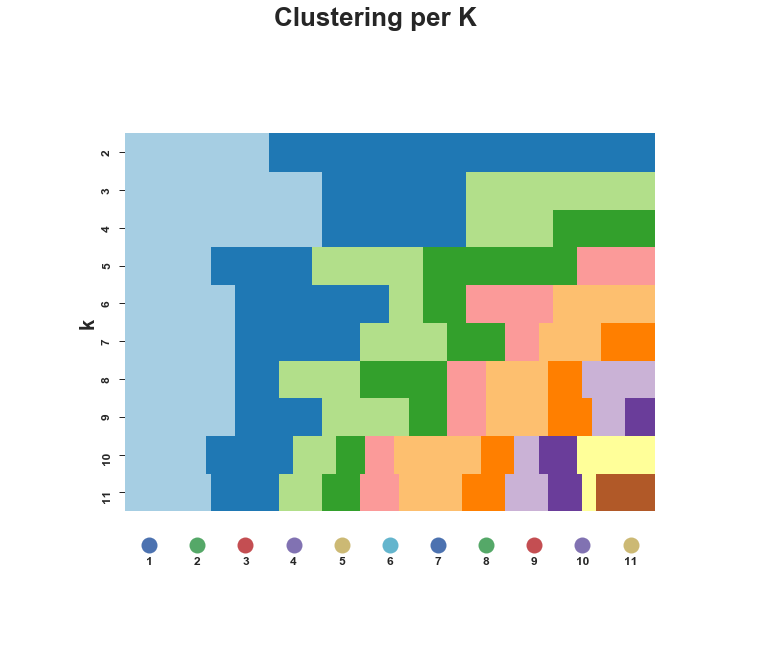

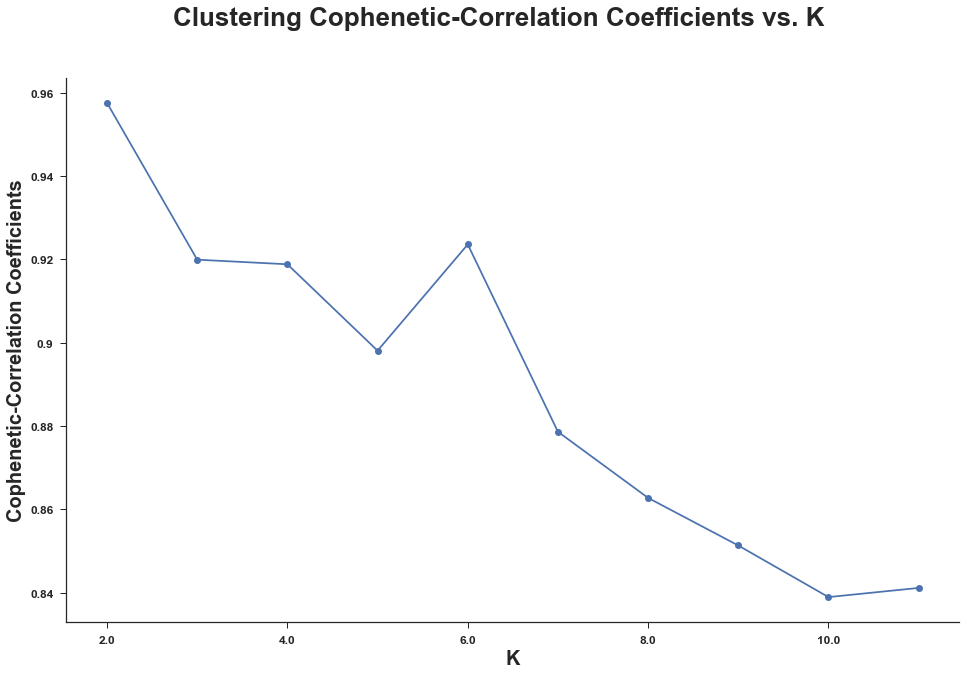

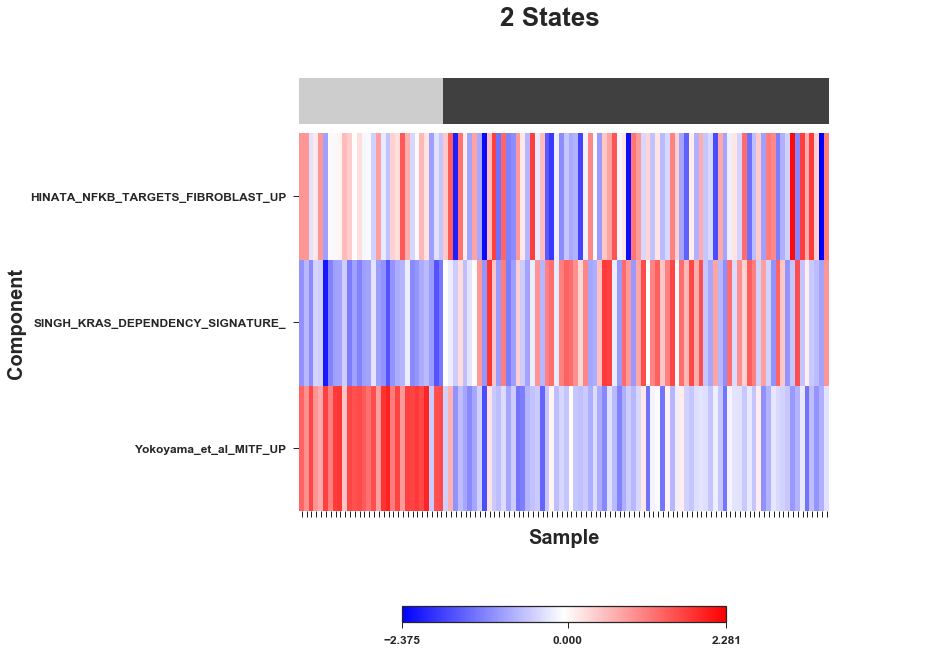

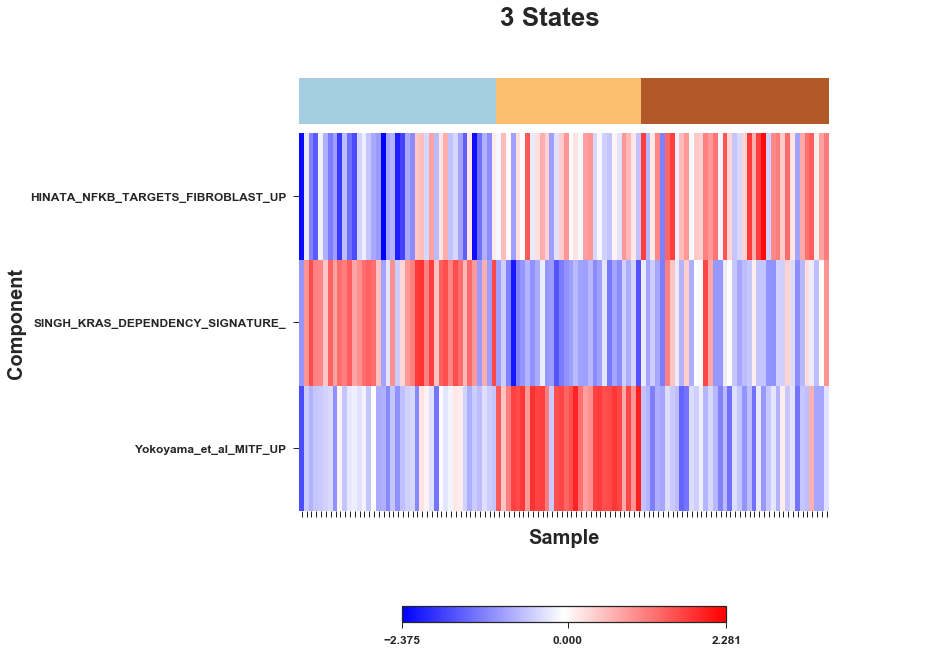

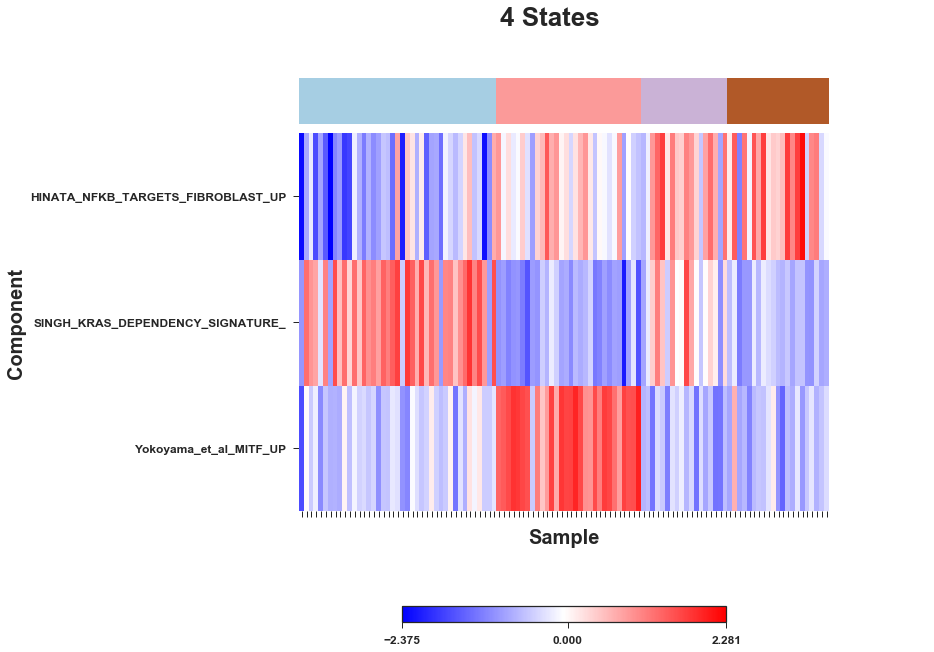

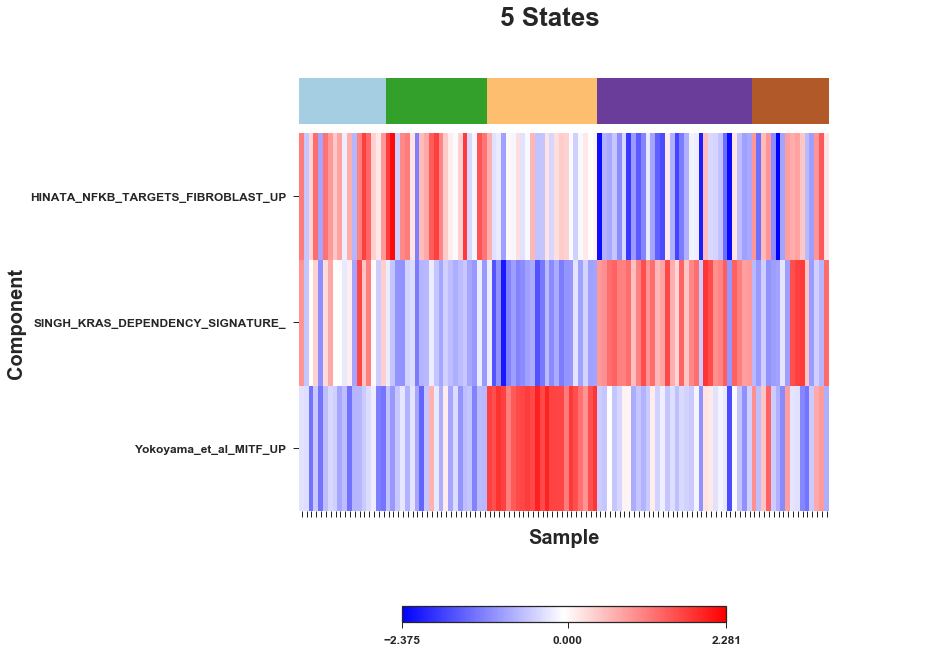

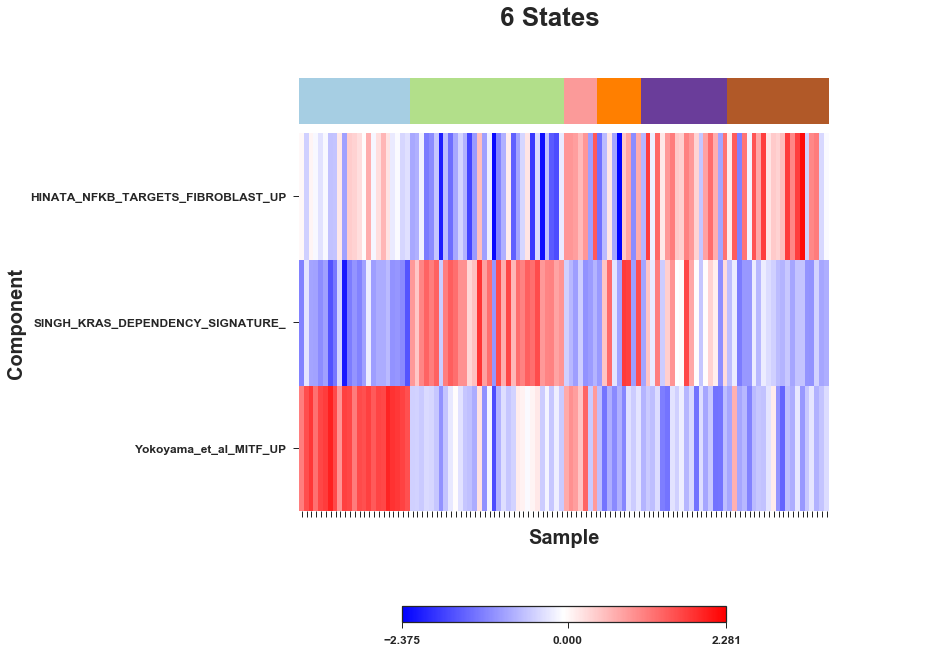

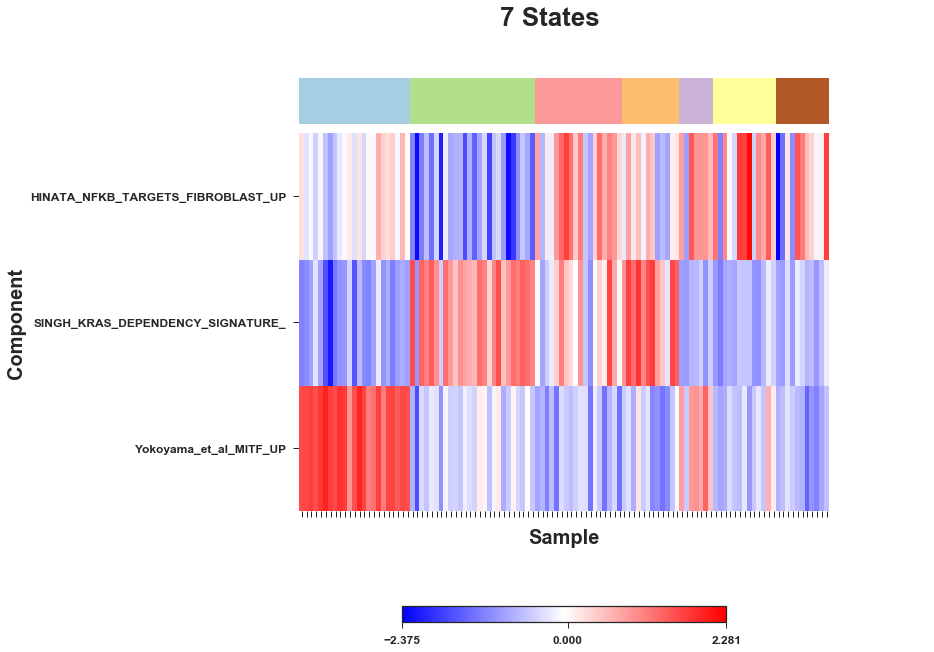

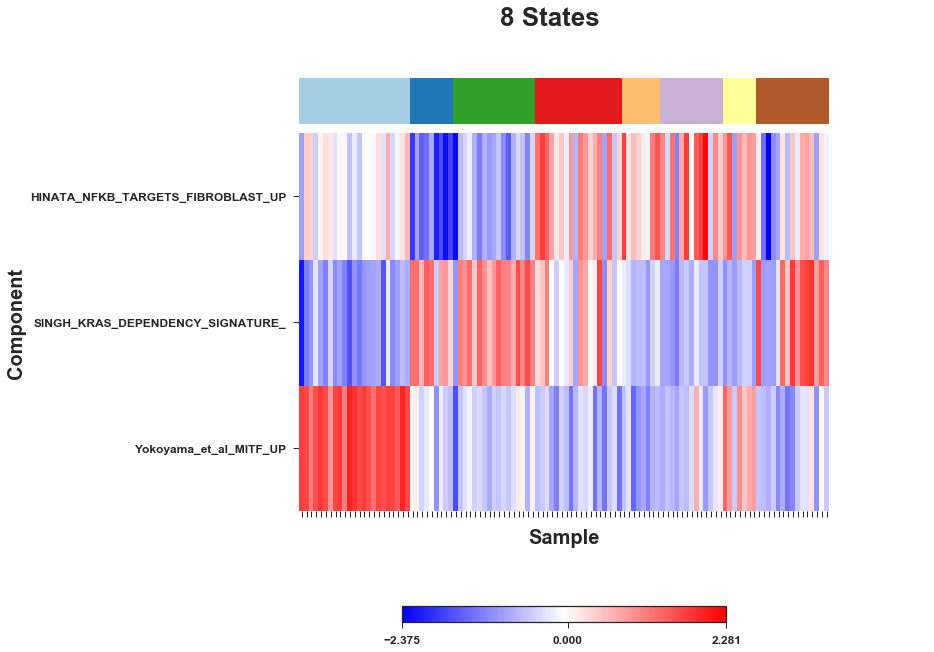

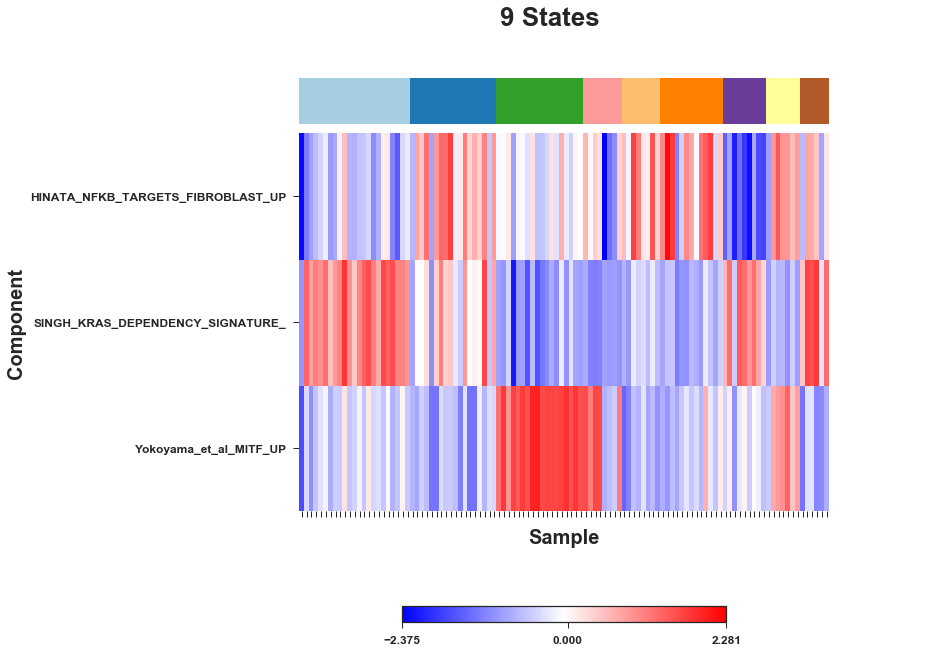

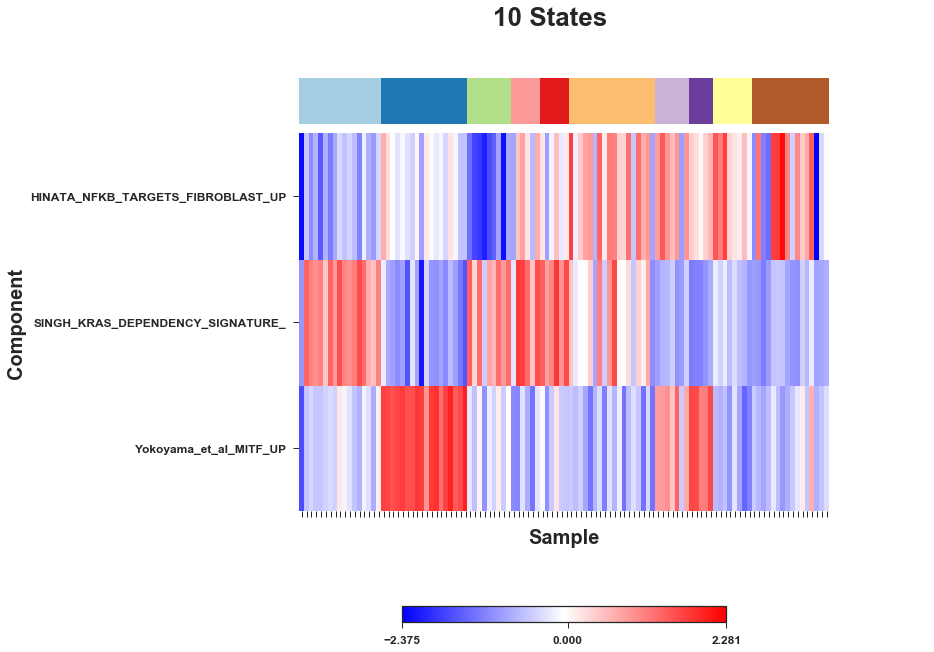

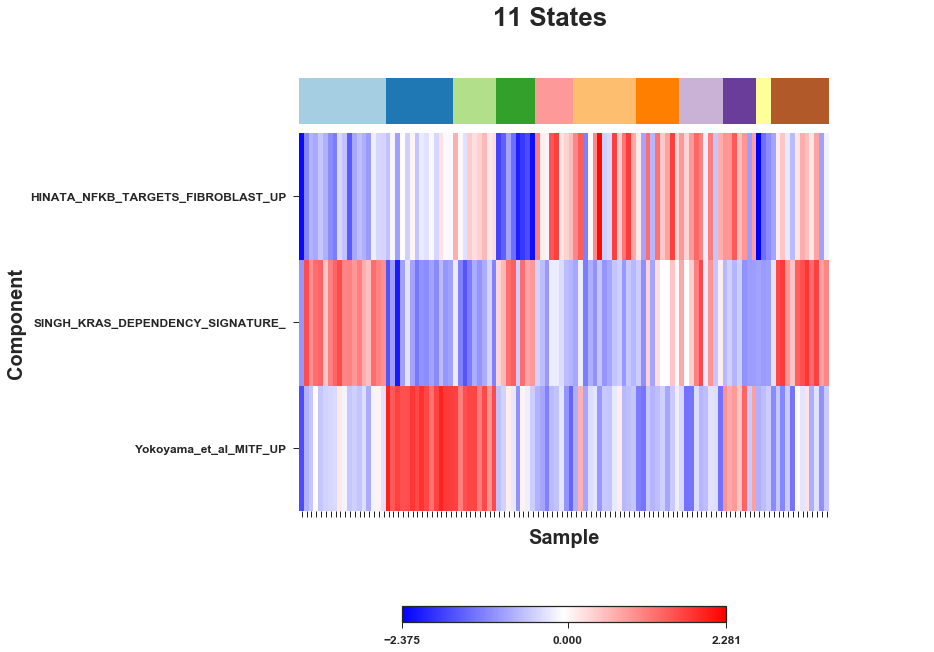

In [14]:
pathway_expression_df = ccal.read_gct('../data/CCLE.rpkm.PATHWAYS.v1.gct')

braf_mutants = mut_cna_df.columns[mut_cna_df.ix['BRAF_MUT', :].astype(bool)]
h_matrix = ccal.read_gct('../results/nmf/matrices/nmf_k9_h.gct')
braf_mutant_h_matrix = h_matrix.ix[:, h_matrix.columns & braf_mutants]

pathways = pathway_expression_df.ix[['HINATA_NFKB_TARGETS_FIBROBLAST_UP',
                                                                       'SINGH_KRAS_DEPENDENCY_SIGNATURE_',
                                                                       'Yokoyama_et_al_MITF_UP'], pathway_expression_df.columns & braf_mutants]

braf_path_dist_matrix, braf_path_clusterings, braf_path_cophen_coeff = ccal.oncogps.define_states(matrix = pathways,
                                                                                                                                                       ks = range(2, 12), 
                                                                                                                                                       max_std=3.25, 
                                                                                                                                                       random_seed = 7802,
                                                                                                                                                       directory_path='../results/BRAF/pathways/')



In [15]:
binary_path_labels = ccal.support.d1.explode_series(braf_path_clusterings.ix[3,:])
braf_path_sample_labels = braf_path_clusterings.ix[3,:]

[2017-03-09 18:06:07] Using equilateral-triangle component coordinates ...
[2017-03-09 18:06:07] Computing training sample coordinates using 3 components and 2.000 power ...
[2017-03-09 18:06:07] Computing state grids and probabilities ...
[2017-03-09 18:06:07] Plotting ...


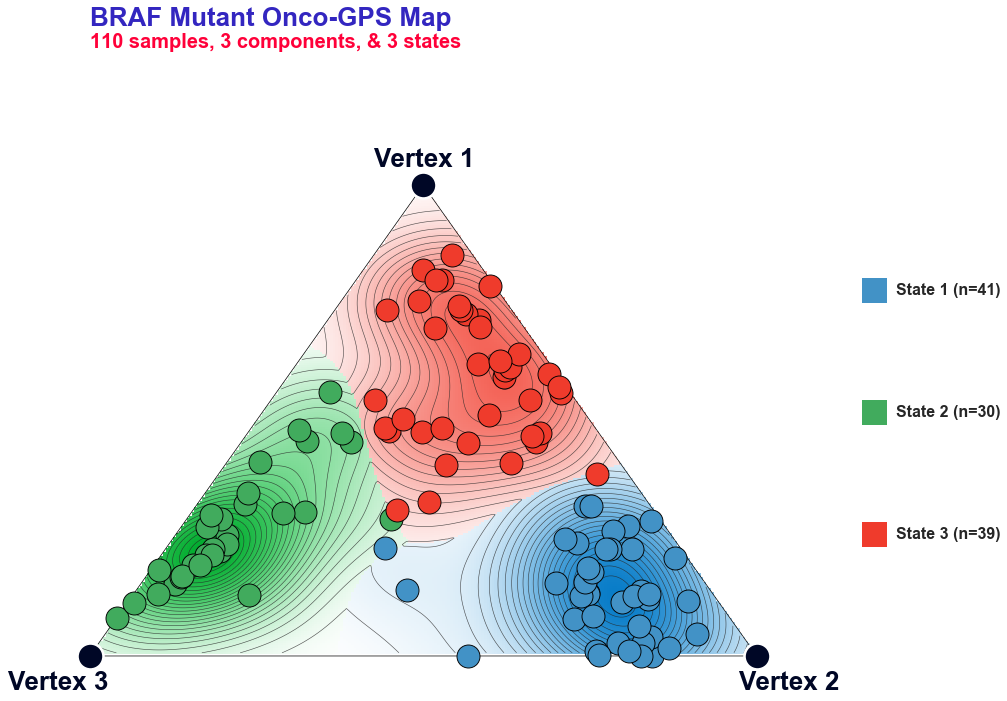

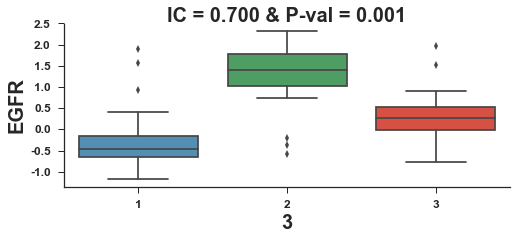

In [16]:
ccal.oncogps.make_oncogps(training_h=pathways, 
                                                     training_states=braf_path_sample_labels,
                                                     title='BRAF Mutant Onco-GPS Map',
                                                     equilateral=True,
                                                     legend_markersize=25,
                                                     state_colors=[blue, green, red],
                                                     power = 2,
                                                     kde_bandwidth_factor=0.8,
                                                     std_max=2)
                                                     #filepath=join(DIR_RESULT, 'BRAF_Onco-GPS.PATHWAY_BASED.pdf'))
    
ccal.plot_violin_box_or_bar(braf_sample_labels, annotation.ix[braf_sample_labels.index], colors=[blue, green, red],
                                                        violin_or_box='box', figure_size=(8,3))

[2017-03-09 18:06:11] Computing distances between samples, making a distance matrix ...
[2017-03-09 18:06:11] Computing associations (axis=0) between matrices (0/106) ...
[2017-03-09 18:06:11] Computing associations (axis=0) between matrices (1/106) ...
[2017-03-09 18:06:11] Computing associations (axis=0) between matrices (2/106) ...
[2017-03-09 18:06:12] Computing associations (axis=0) between matrices (3/106) ...
[2017-03-09 18:06:12] Computing associations (axis=0) between matrices (4/106) ...
[2017-03-09 18:06:12] Computing associations (axis=0) between matrices (5/106) ...
[2017-03-09 18:06:12] Computing associations (axis=0) between matrices (6/106) ...
[2017-03-09 18:06:12] Computing associations (axis=0) between matrices (7/106) ...
[2017-03-09 18:06:12] Computing associations (axis=0) between matrices (8/106) ...
[2017-03-09 18:06:12] Computing associations (axis=0) between matrices (9/106) ...
[2017-03-09 18:06:13] Computing associations (axis=0) between matrices (10/106) ..

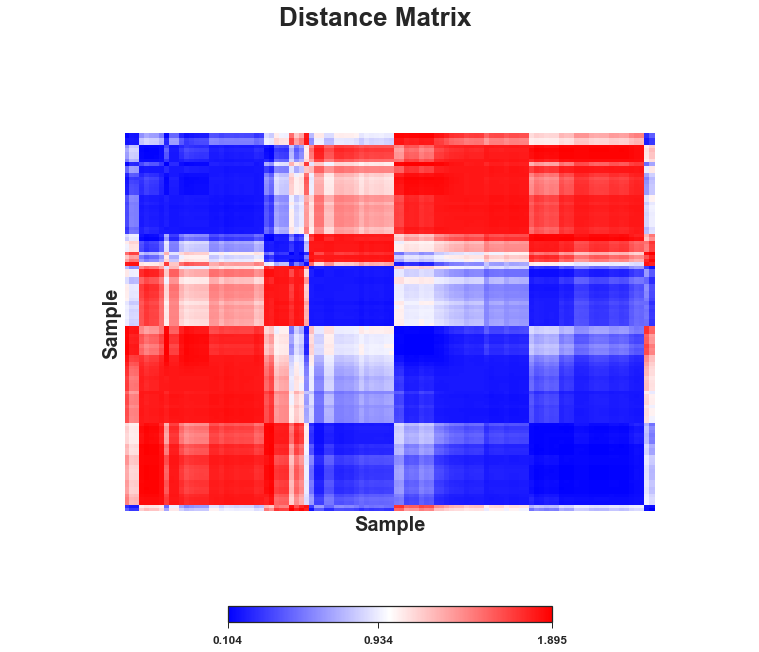

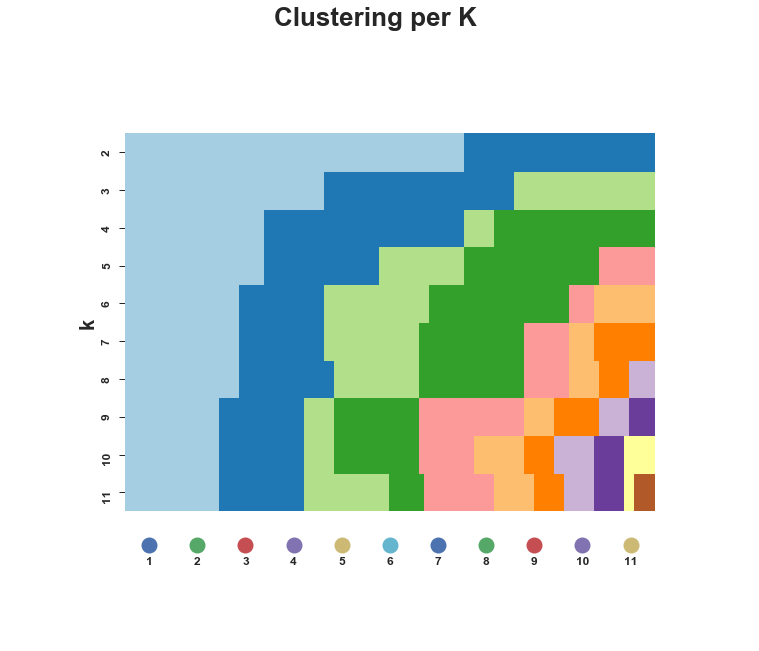

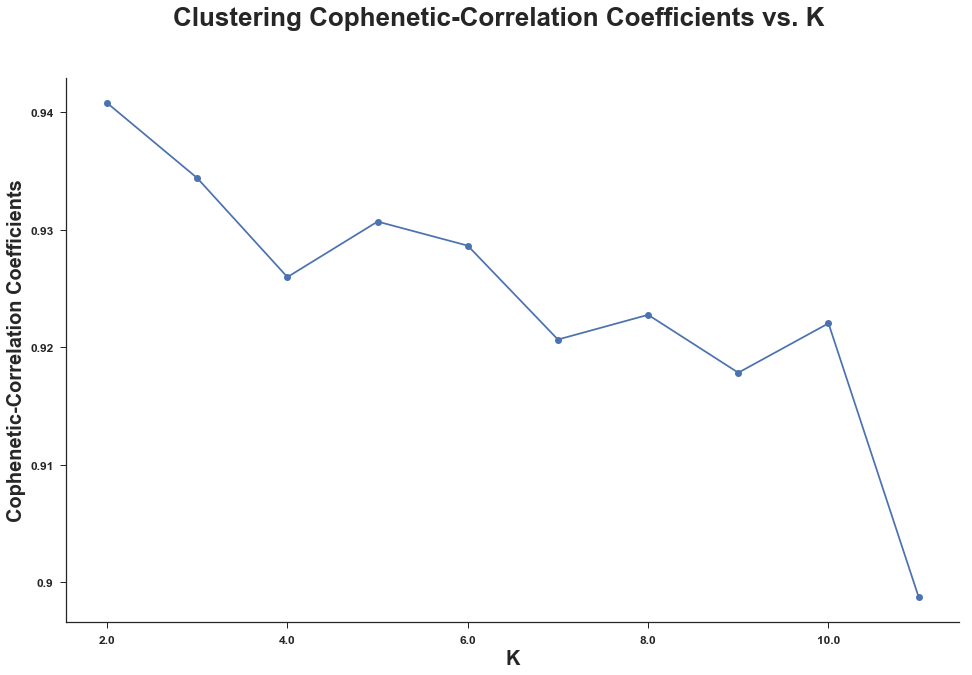

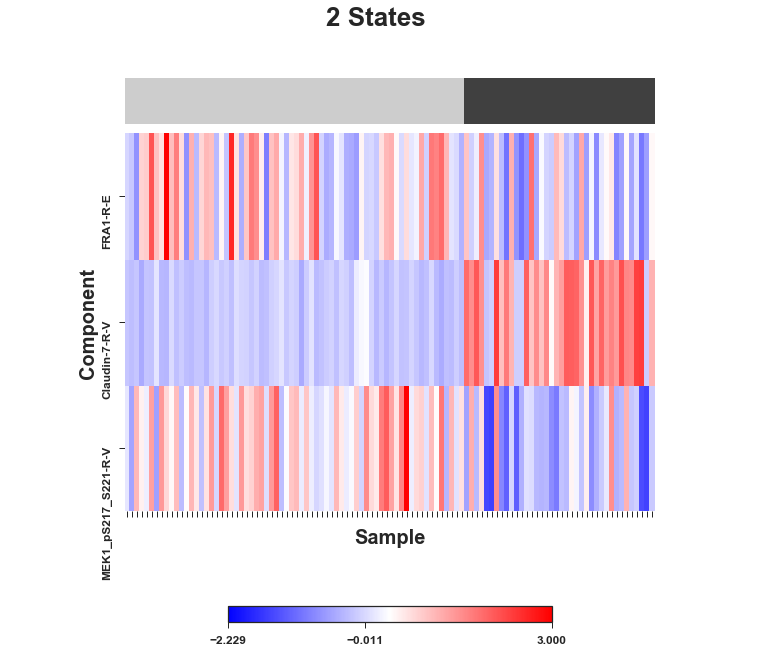

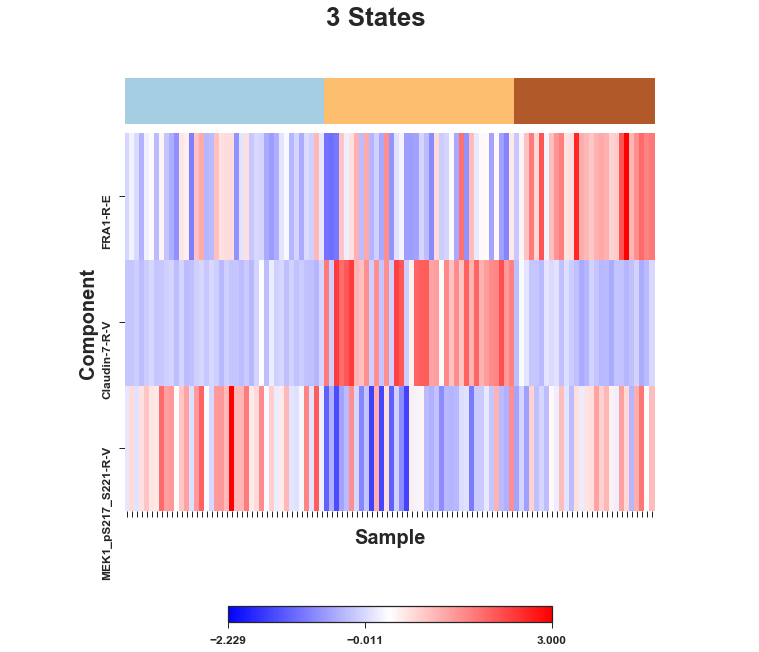

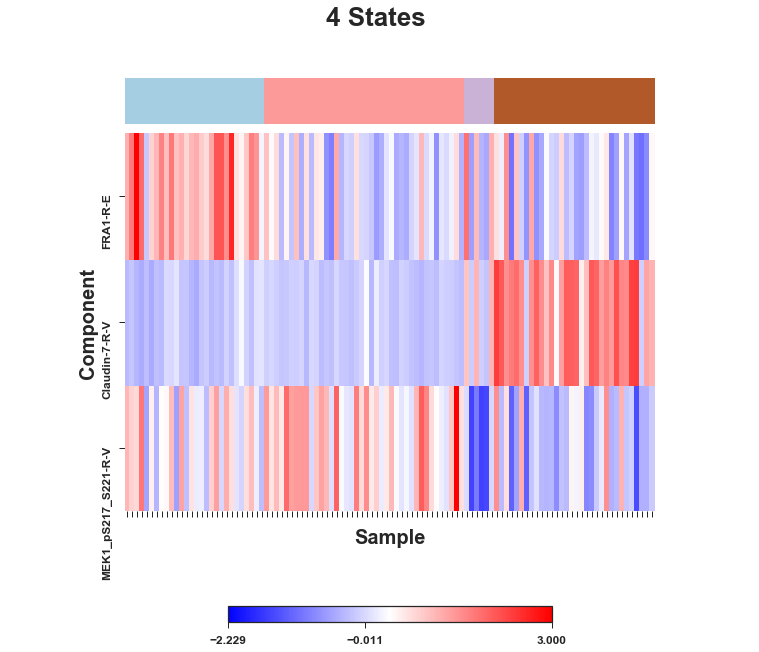

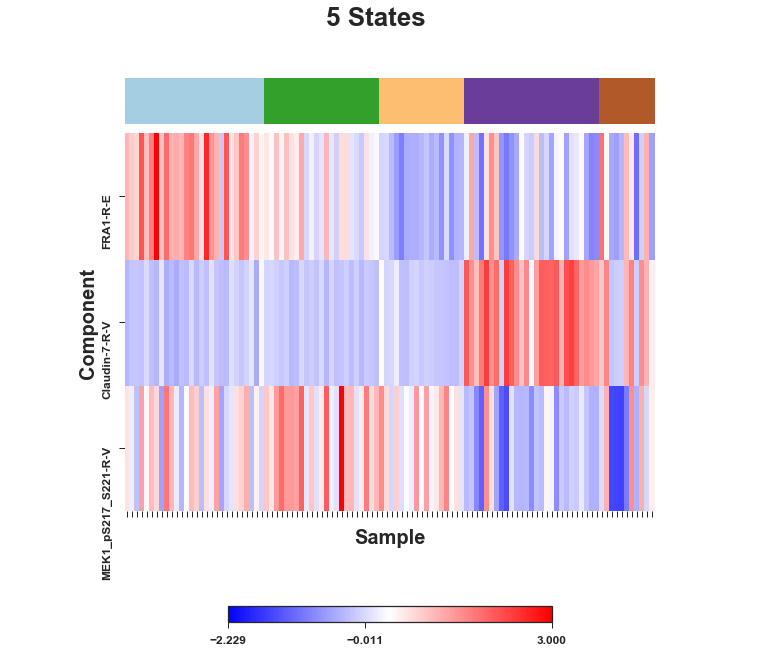

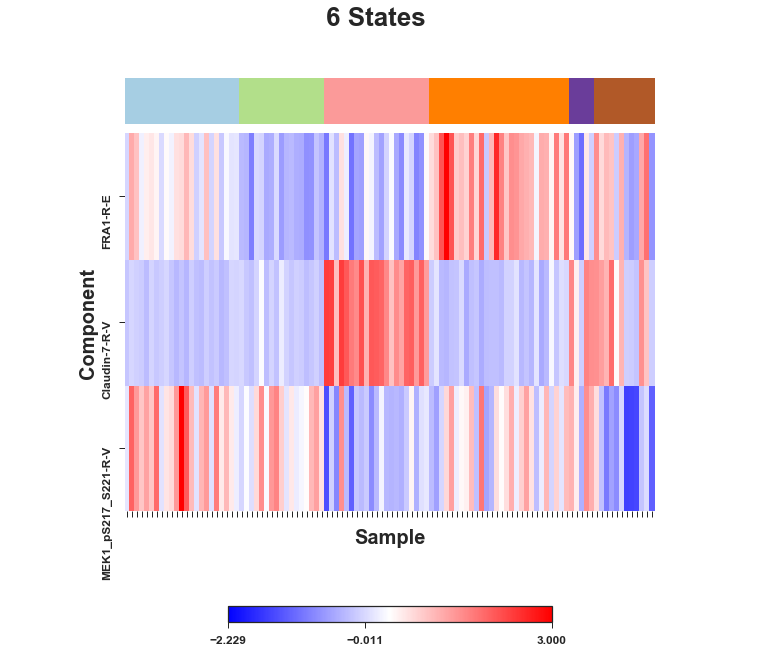

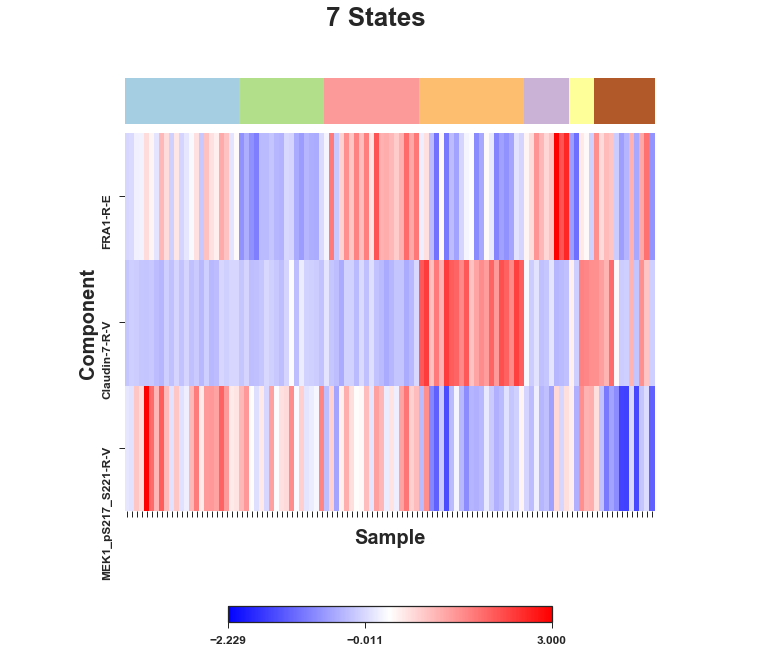

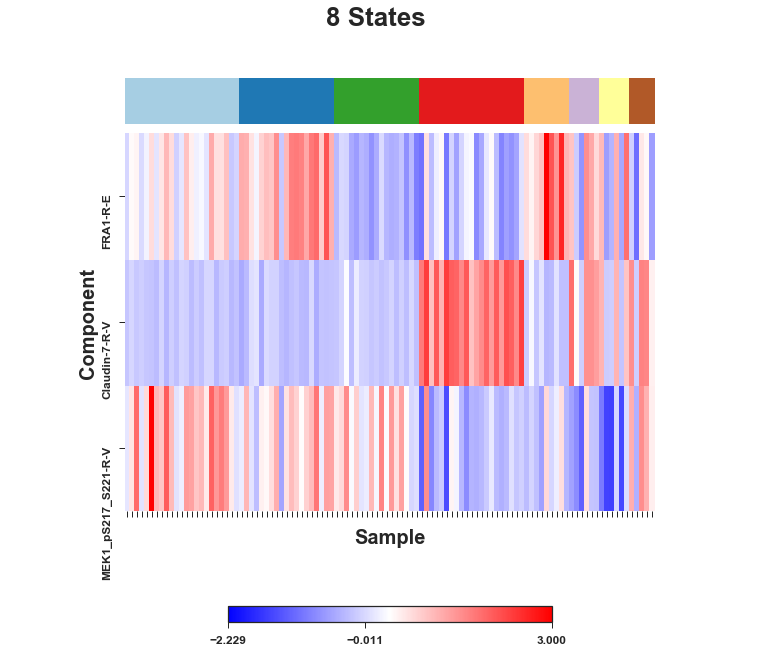

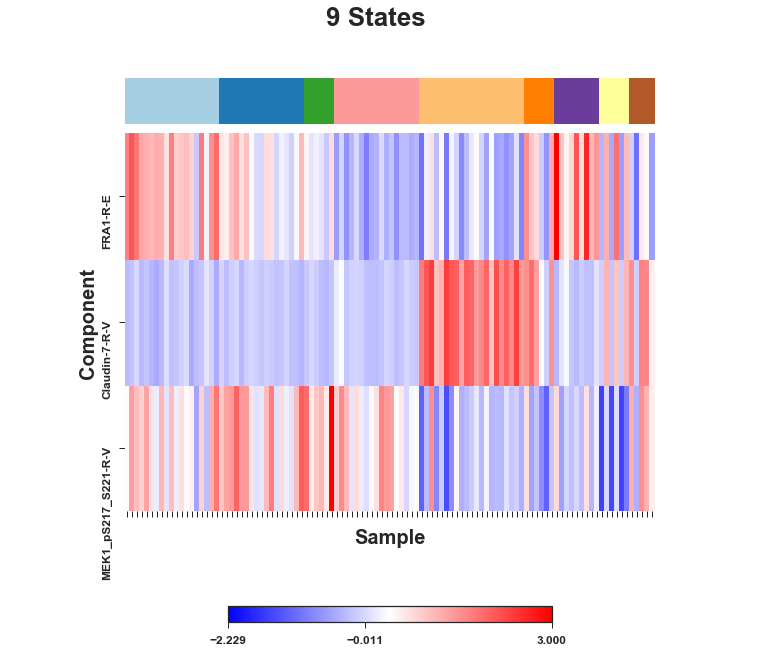

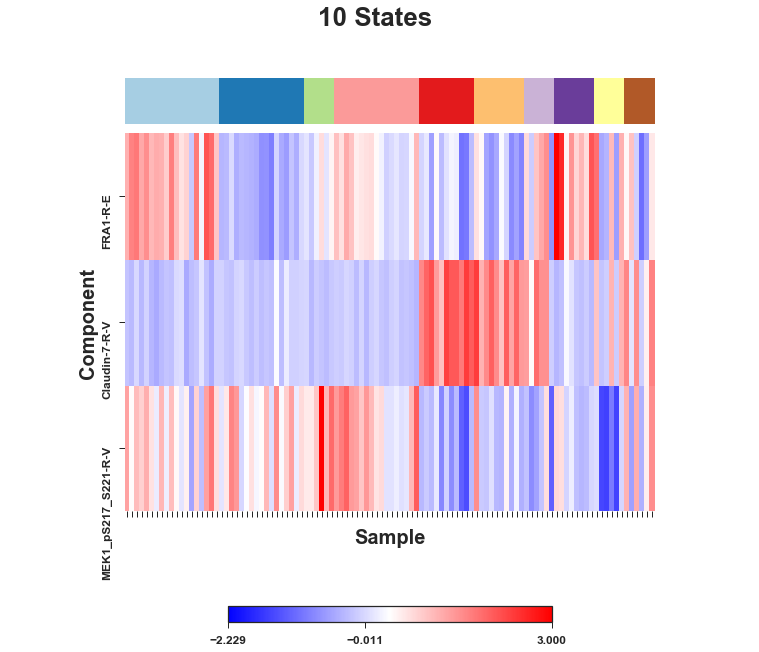

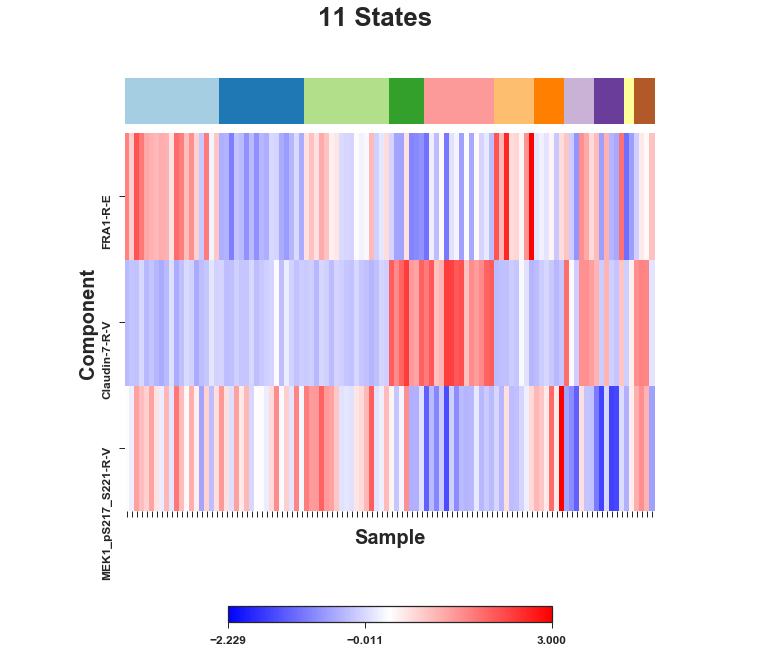

In [17]:
protein_names = ['FRA1-R-E', 'Claudin-7-R-V', 'MEK1_pS217_S221-R-V']
proteins = protein_expression_df.ix[protein_names, protein_expression_df.columns & braf_mutants]

braf_prot_dist_matrix, braf_prot_clusterings, braf_prot_cophen_coeff = ccal.oncogps.define_states(matrix = proteins,
                                                                                                                                                       ks = range(2, 12), 
                                                                                                                                                       max_std=3.25, 
                                                                                                                                                       random_seed = 2345,
                                                                                                                                                       directory_path='../results/BRAF/proteins/')

In [18]:
binary_prot_labels = ccal.support.d1.explode_series(braf_prot_clusterings.ix[3, :])
braf_prot_sample_labels = braf_prot_clusterings.ix[3, :]

[2017-03-09 18:06:49] Using equilateral-triangle component coordinates ...
[2017-03-09 18:06:49] Computing training sample coordinates using 3 components and 2.000 power ...
[2017-03-09 18:06:49] Computing state grids and probabilities ...
[2017-03-09 18:06:50] Plotting ...


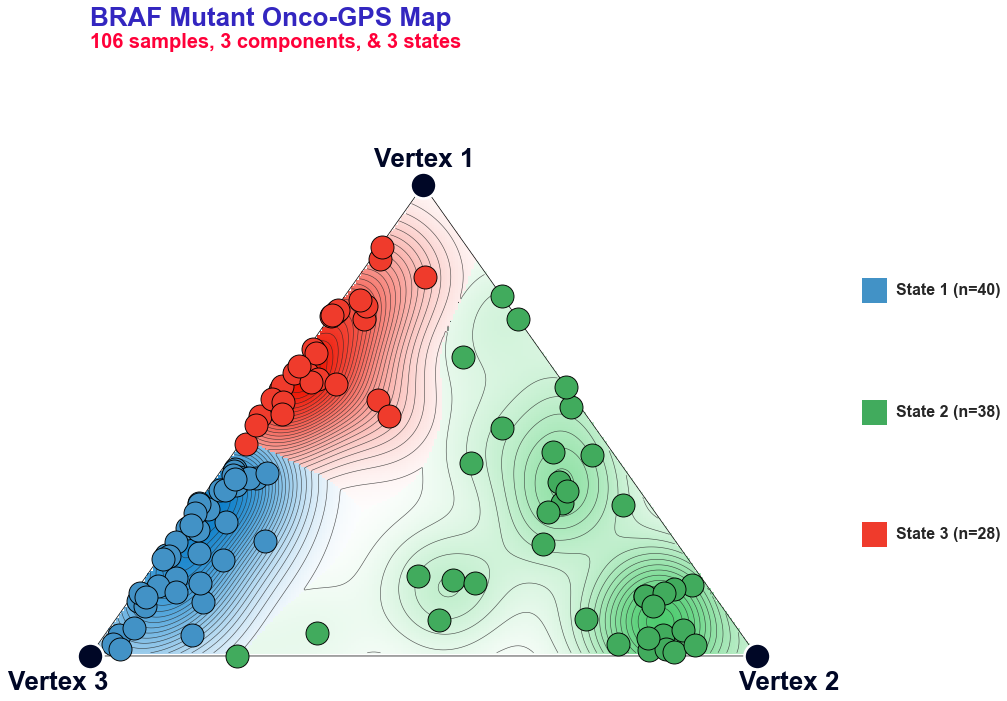

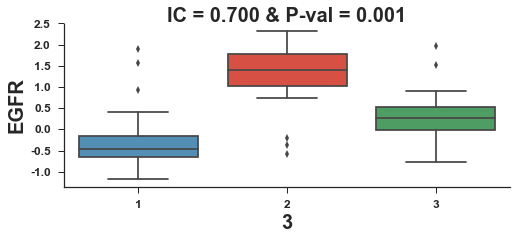

In [19]:
ccal.oncogps.make_oncogps(training_h=proteins, 
                                                     training_states=braf_prot_sample_labels,
                                                     title='BRAF Mutant Onco-GPS Map',
                                                     equilateral=True,
                                                     legend_markersize=25,
                                                     state_colors=[blue, green, red],
                                                     power = 2,
                                                     kde_bandwidth_factor=0.8,
                                                     std_max=2)
                                                     #filepath=join(DIR_RESULT, 'BRAF_Onco-GPS.PROTEIN_BASED.pdf'))
    
ccal.plot_violin_box_or_bar(braf_sample_labels, annotation.ix[braf_sample_labels.index], colors=[blue, red, green],
                                                        violin_or_box='box', figure_size=(8,3))    

<hr style="border: none; border-bottom: 1px solid #88BBEE;">
#### 7.5 Sanger Dataset Projections

In [20]:
sanger_mut_cna_df = ccal.read_gct('../data/sanger_mutations.out.gct')
sanger_gene_expression_df = ccal.read_gct('../data/sanger_Expression.out.NO_HAEM.gct')
sanger_drug_sensitivity_df = ccal.read_gct('../data/sanger_drug_sensitivity.out.gct')
sanger_pathways_df = ccal.read_gct('../data/sanger_Expression.out.NO_HAEM.SELECTED_SIGNATURES.gct')

sanger_h_matrix = ccal.read_gct('../data/sanger_expression.out.BRAF_MUT.H_proj.v1_NO_CCLE_OVERLAP.gct')
sanger_h_matrix2 = sanger_h_matrix.ix[[ 1, 6, 8], :]  # entries 1,6,8 are C7, C3 and C6
sanger_h_matrix2.index = [7, 3, 6]

In [21]:
braf_sample_labels.shape

(97,)

In [22]:
braf_h_matrix

NCIH2227_LUNG  OUMS23_LARGE_INTESTINE  NCIH2087_LUNG  SKMEL1_SKIN  \
7     482.151580                4.355349    2636.991182   207.434806   
3      68.723068             1220.120201    1357.131768   680.296541   
6     640.700141              636.812487     297.307079  6855.149858   

   DU4475_BREAST  NCIH508_LARGE_INTESTINE  NCIH1651_LUNG  NCIH1666_LUNG  \
7    1278.564691                43.278860      26.104288    2396.865307   
3    2568.678370              5943.860596     955.492930      16.337564   
6     111.809849                47.644758     945.263114     109.636808   

   HS936T_SKIN  SKMEL28_SKIN         ...          SKMEL5_SKIN  WM2664_SKIN  \
7     0.911569    232.432574         ...            75.903030   231.713329   
3    12.568805    576.180663         ...           293.781327   766.966085   
6  7198.986589   7979.550407         ...          7250.837390  7307.370699   

   KM12_LARGE_INTESTINE  LOXIMVI_SKIN  UACC257_SKIN   IGR37_SKIN  \
7            407.860111   2784.812045      0.213284    51.672127   
3           5119.864679    285.220477    731.115101    17.207702   
6            284.341936   2250.675529   7976.818336  7362.671237   

   BHT101_THYROID  BCPAP_THYROID  CL34_LARGE_INTESTINE  JHUEM7_ENDOMETRIUM  
7     3521.193251    3112.441778            126.167532          133.394766  
3     1592.021448     265.039386           6187.781454         1222.865019  
6      506.320409    1496.577871              0.391194         1846.051395  

[3 rows x 97 columns]

In [23]:
sanger_h_matrix2

ACN     COLO_205       HMV_II       HOP_92      HTC_C3  \
7    33.000956   143.805638    53.007826  1068.818041  747.401941   
3   171.124235  1244.416316   265.283461     0.000000  119.508731   
6  1634.324953   247.517156  1632.219644   247.756604   98.577982   

      IST_MEL1          K5          M14  MDA_MB_231      MMAC_SF  \
7    13.046300  561.288574   279.033178  992.158787     0.000000   
3     0.000000    0.000000   190.739465  241.629495   169.812958   
6  1102.861878  447.452648  1700.410021  133.500666  1912.469820   

        MZ7_mel   NCI_H2170   NCI_H2405   RPMI_7951      RVH_421       SW872  \
7  1.134863e-14  257.424781  782.846387  291.312140   171.899570  205.226056   
3  1.843150e+02  680.734382  382.411559   83.447073   187.531650    0.000000   
6  1.766547e+03  134.301075  195.700842  677.284929  1631.602219  686.882980   

        SW982  
7  412.515143  
3    2.903229  
6  555.356926

[2017-03-09 18:06:55] Using equilateral-triangle component coordinates ...
[2017-03-09 18:06:55] Computing training sample coordinates using 3 components and 1.000 power ...
[2017-03-09 18:06:55] Computing state grids and probabilities ...
[2017-03-09 18:06:56] Computing testing sample coordinates using 3 components and 1.000 power ...
[2017-03-09 18:06:56] Plotting ...


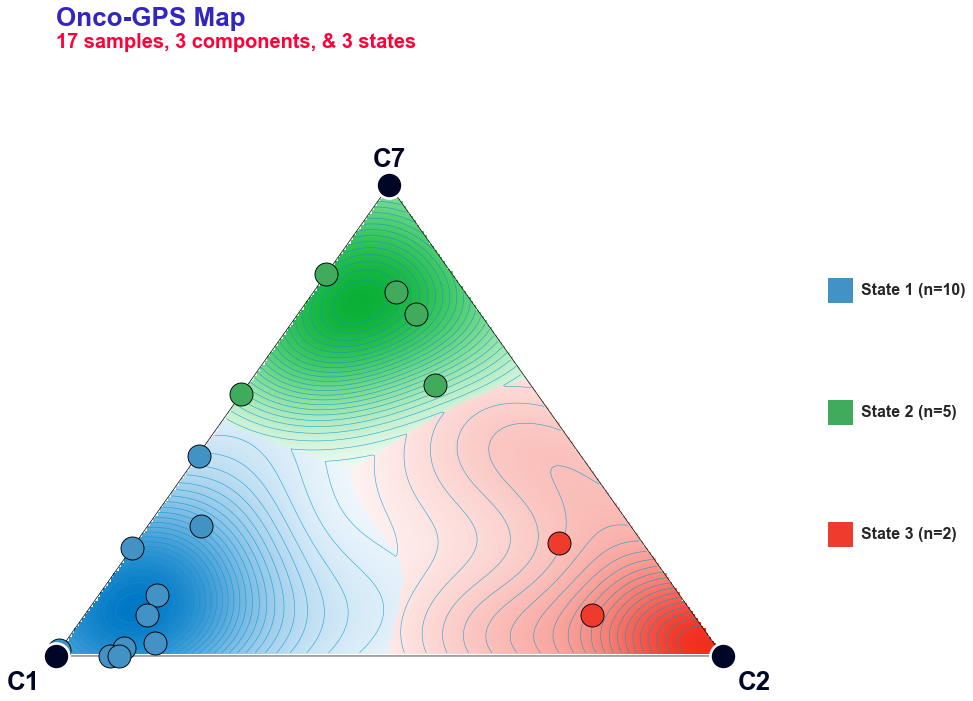

In [24]:
ccal.oncogps.make_oncogps(training_h=braf_h_matrix, 
                              training_states=braf_sample_labels, 
                              testing_h = sanger_h_matrix2,                
                              testing_h_normalization=None,
                              equilateral=True,
                              legend_markersize=25,
                              state_colors=[blue, green, red],
                              power = 1,
                              kde_bandwidth_factor=0.8,
                              contour_linecolor=light_blue,
                              component_names = ["C7", "C2", "C1"],
                              std_max = 2)
                              #filepath=join(DIR_RESULT, 'Sanger_BRAF_Onco-GPS_Feature_{}.pdf'.format(annotation.name)))
    
# ccal.plot_violin_box_or_bar(braf_sample_labels, annotation.ix[braf_sample_labels.index], colors=[purple, blue, red, green],
#                                                         violin_or_box='box', figure_size=(10,3.5))

In [ ]:
for i, alias in [('AXL', 'AXL')]:

    training_annotation = gene_expression_df.ix[i, braf_h_matrix.columns]
    training_annotation.name = alias
    
    testing_annotation = sanger_gene_expression_df .ix[i, :]
    testing_annotation.name = alias

    ccal.oncogps.make_oncogps(training_h=braf_h_matrix, 
                              training_states=braf_sample_labels, 
                              training_annotation=training_annotation,
                              
                              #annotate_background=True,
                              
                              testing_h = sanger_h_matrix2,
                              testing_h_normalization='using_testing_h',
                              testing_annotation=testing_annotation,
                              
                              title =annotation.name,
                              
                              equilateral=True,
                              legend_markersize=25,
                              state_colors=[blue, green, red],
                              power = 1,
                              kde_bandwidth_factor=0.8,
                              contour_linecolor=light_blue,
                              component_names = ["C7", "C2", "C1"],
                              sample_name_color='000726',
                              std_max = 2)
                              #filepath=join(DIR_RESULT, 'Sanger_BRAF_Onco-GPS_Feature_{}.pdf'.format(annotation.name)))

[2017-03-09 18:07:09] Using equilateral-triangle component coordinates ...
[2017-03-09 18:07:09] Computing training sample coordinates using 3 components and 1.000 power ...
[2017-03-09 18:07:09] Computing state grids and probabilities ...
[2017-03-09 18:07:09] Computing annotation grids and probabilities ...
[2017-03-09 18:07:18] Computing testing sample coordinates using 3 components and 1.000 power ...
[2017-03-09 18:07:18] Plotting ...


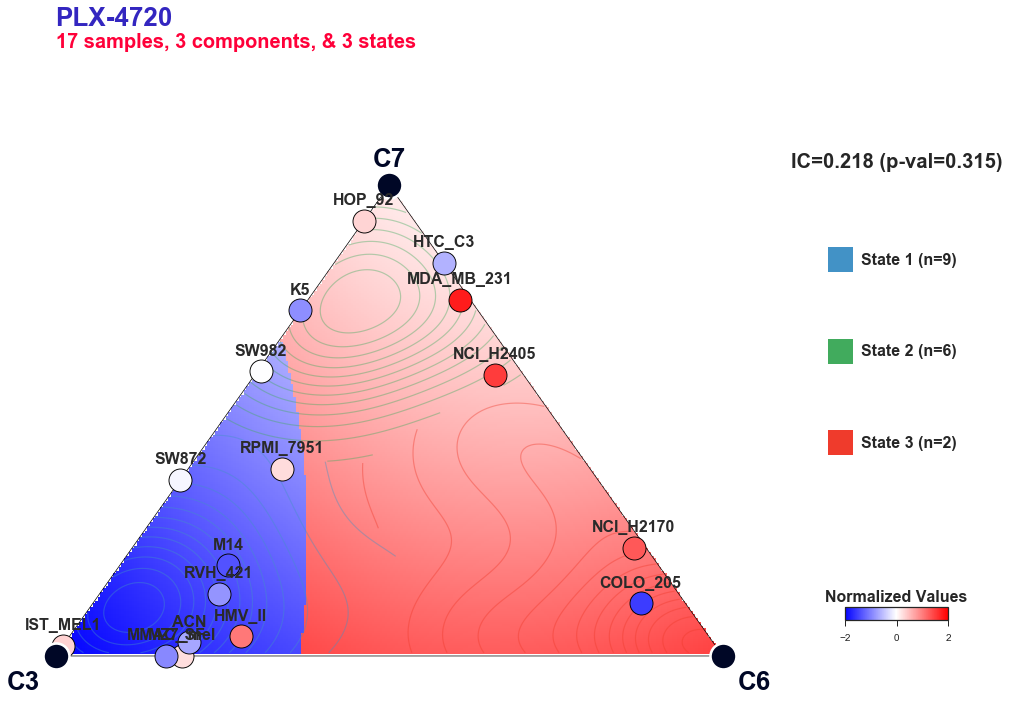

In [26]:
training_annotation = drug_sensitivity_df.ix['PLX-4720', braf_h_matrix.columns]
training_annotation.name = 'PLX-4720'

testing_annotation = sanger_drug_sensitivity_df.ix['PLX4720_IC_50', :]
testing_annotation.name = 'PLX-4720'

training_annotation
testing_annotation

ccal.oncogps.make_oncogps(training_h=braf_h_matrix, 
                          training_states=braf_sample_labels, 
                          training_annotation=training_annotation,

                          annotate_background=True,

                          testing_h = sanger_h_matrix2,
                          testing_h_normalization='using_testing_h',
                          testing_annotation=testing_annotation,

                          title =training_annotation.name,

                          equilateral=True,
                          legend_markersize=25,
                          state_colors=[blue, green, red],
                          power = 1,
                          kde_bandwidth_factor=0.8,
                          contour_linecolor=light_blue,
                          component_names = ["C7", "C6", "C3"],
                          sample_name_color='000726',
                          std_max = 2)
                          #filepath=join(DIR_RESULT, 'Sanger_BRAF_Onco-GPS_Feature_{}.pdf'.format(annotation.name)))

[2017-03-09 18:07:22] Using equilateral-triangle component coordinates ...
[2017-03-09 18:07:22] Computing training sample coordinates using 3 components and 1.000 power ...
[2017-03-09 18:07:22] Computing state grids and probabilities ...
[2017-03-09 18:07:22] Computing annotation grids and probabilities ...
[2017-03-09 18:07:31] Computing testing sample coordinates using 3 components and 1.000 power ...
[2017-03-09 18:07:31] Plotting ...
[2017-03-09 18:07:34] Using equilateral-triangle component coordinates ...
[2017-03-09 18:07:34] Computing training sample coordinates using 3 components and 1.000 power ...
[2017-03-09 18:07:34] Computing state grids and probabilities ...
[2017-03-09 18:07:34] Computing annotation grids and probabilities ...
[2017-03-09 18:07:43] Computing testing sample coordinates using 3 components and 1.000 power ...
[2017-03-09 18:07:43] Plotting ...
[2017-03-09 18:07:46] Using equilateral-triangle component coordinates ...
[2017-03-09 18:07:46] Computing train

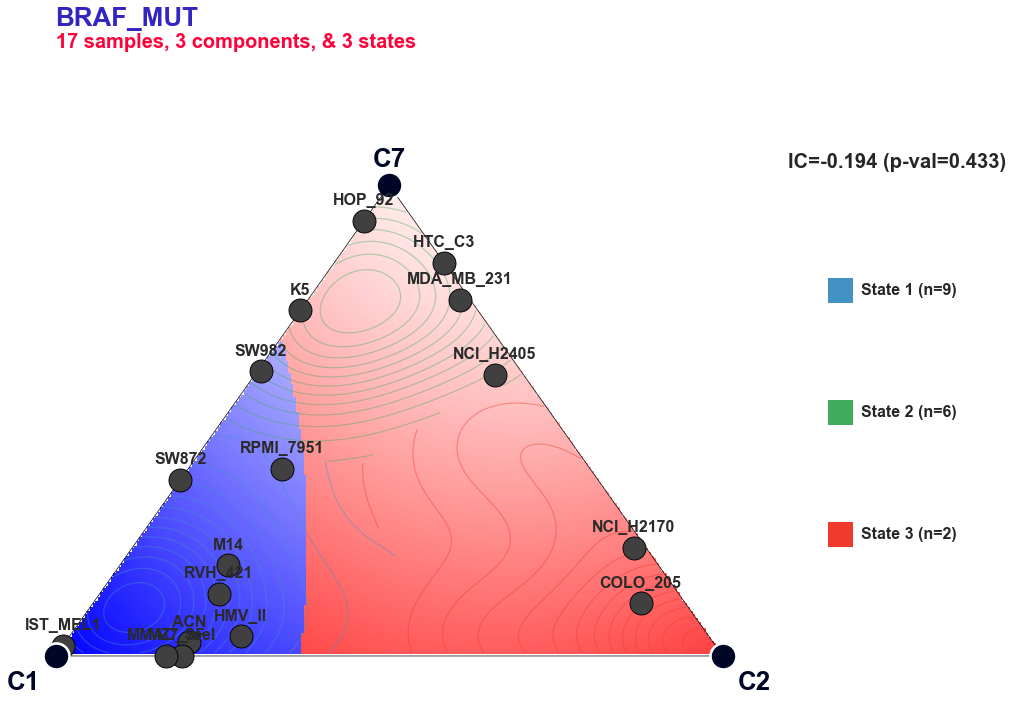

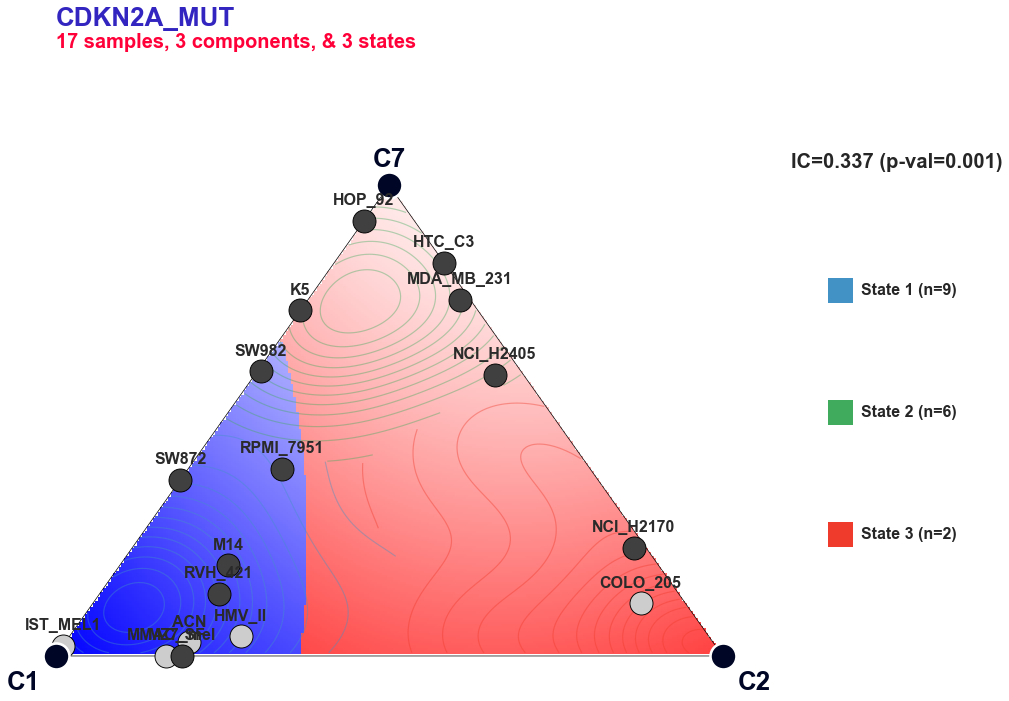

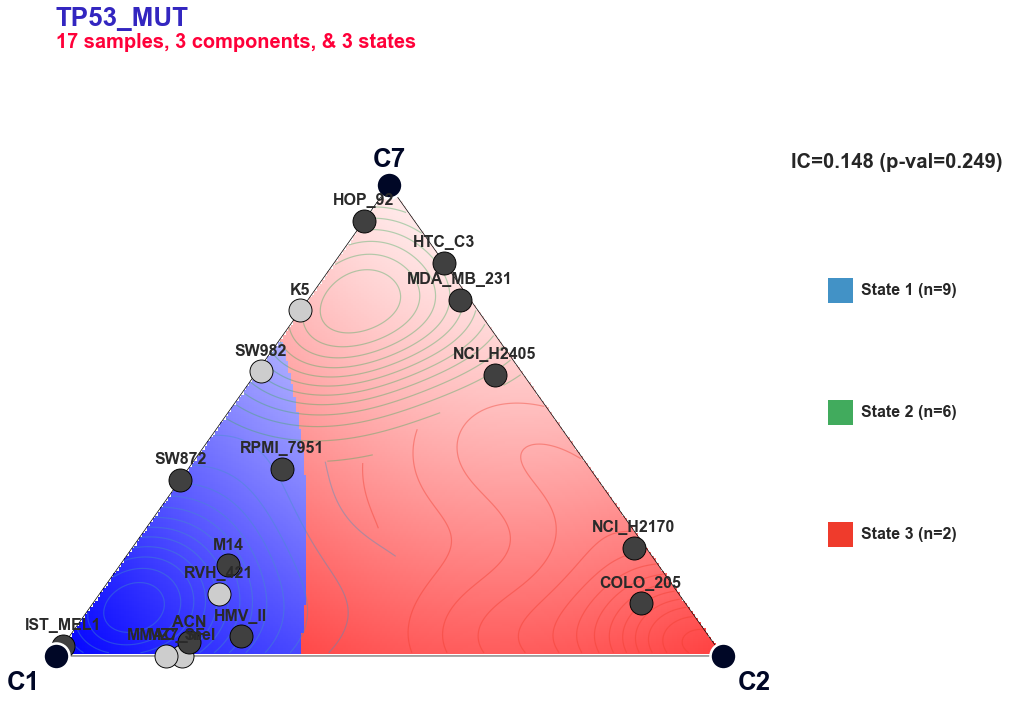

In [28]:
for i in sanger_mut_cna_df.index[sanger_mut_cna_df.ix[:, 'HTC_C3'] == 1]:
    testing_annotation = sanger_mut_cna_df.ix[i, :]
    ccal.oncogps.make_oncogps(training_h=braf_h_matrix, 
                              training_states=braf_sample_labels, 
                              training_annotation=training_annotation,

                              annotate_background=True,
                              
                              testing_h = sanger_h_matrix2,
                              testing_h_normalization='using_testing_h',
                              testing_annotation=testing_annotation,

                              title =testing_annotation.name,
                              annotation_type='binary',

                              equilateral=True,
                              legend_markersize=25,
                              state_colors=[blue, green, red],
                              power = 1,
                              kde_bandwidth_factor=0.8,
                              contour_linecolor=light_blue,
                              component_names = ["C7", "C2", "C1"],
                              sample_name_color='000726',
                              std_max = 2)

[2017-03-09 18:07:59] Using equilateral-triangle component coordinates ...
[2017-03-09 18:07:59] Computing training sample coordinates using 3 components and 1.000 power ...
[2017-03-09 18:07:59] Computing state grids and probabilities ...
[2017-03-09 18:07:59] Computing annotation grids and probabilities ...
[2017-03-09 18:08:08] Computing testing sample coordinates using 3 components and 1.000 power ...
[2017-03-09 18:08:08] Plotting ...
[2017-03-09 18:08:11] Using equilateral-triangle component coordinates ...
[2017-03-09 18:08:11] Computing training sample coordinates using 3 components and 1.000 power ...
[2017-03-09 18:08:11] Computing state grids and probabilities ...
[2017-03-09 18:08:11] Computing annotation grids and probabilities ...
[2017-03-09 18:08:19] Computing testing sample coordinates using 3 components and 1.000 power ...
[2017-03-09 18:08:19] Plotting ...
[2017-03-09 18:08:22] Using equilateral-triangle component coordinates ...
[2017-03-09 18:08:22] Computing train

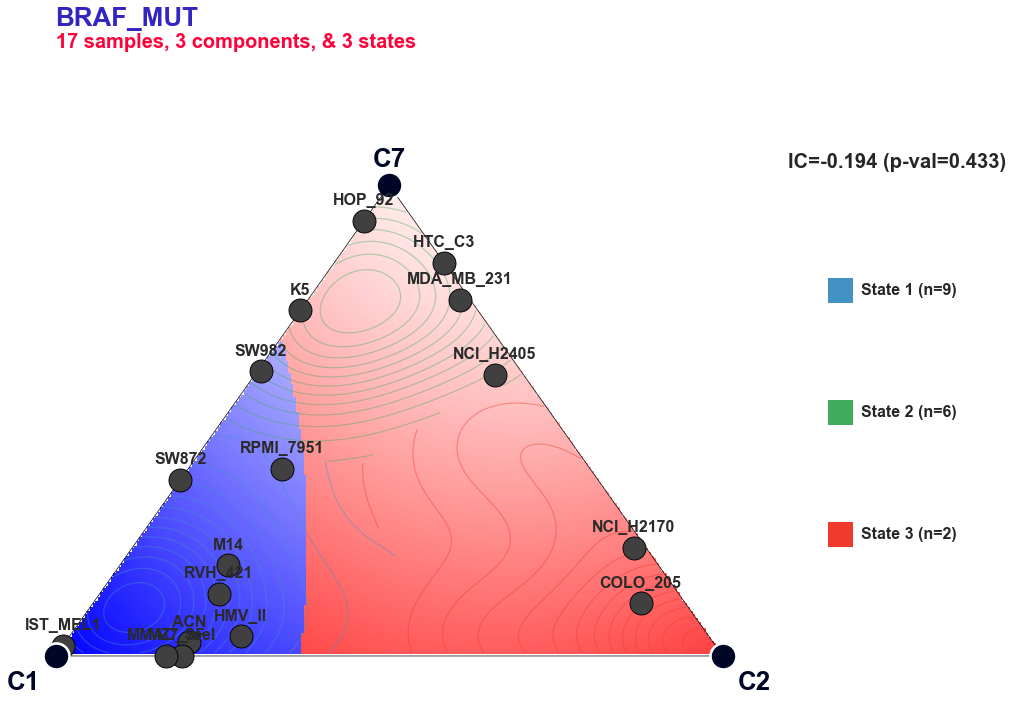

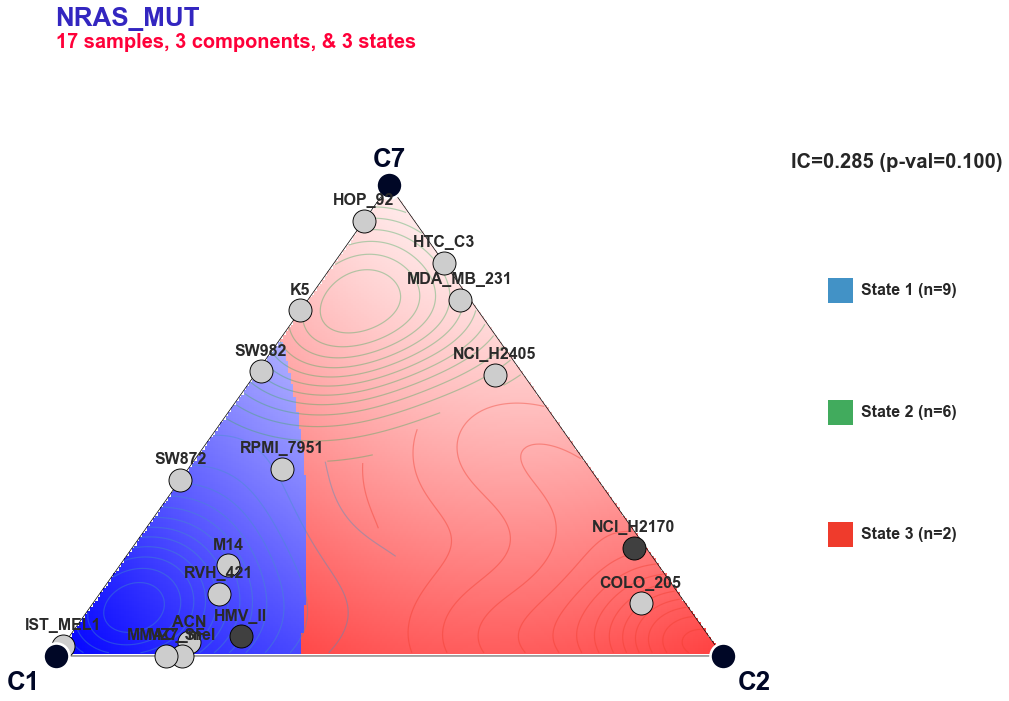

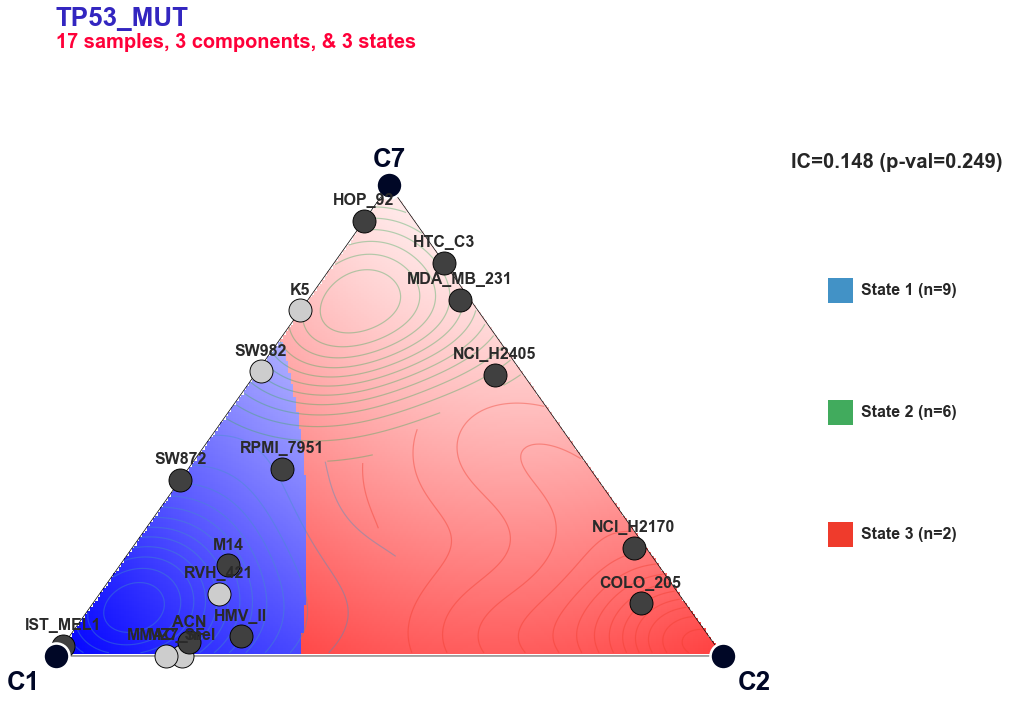

In [29]:
for i in sanger_mut_cna_df.index[sanger_mut_cna_df.ix[:, 'HMV_II'] == 1]:
    testing_annotation = sanger_mut_cna_df.ix[i, :]
    ccal.oncogps.make_oncogps(training_h=braf_h_matrix, 
                              training_states=braf_sample_labels, 
                              training_annotation=training_annotation,

                              annotate_background=True,
                              
                              testing_h = sanger_h_matrix2,
                              testing_h_normalization='using_testing_h',
                              testing_annotation=testing_annotation,

                              title =testing_annotation.name,
                              annotation_type='binary',

                              equilateral=True,
                              legend_markersize=25,
                              state_colors=[blue, green, red],
                              power = 1,
                              kde_bandwidth_factor=0.8,
                              contour_linecolor=light_blue,
                              component_names = ["C7", "C2", "C1"],
                              sample_name_color='000726',
                              std_max = 2)

In [ ]:
for i, alias in [('PD-0325901_IC_50', 'PD-0325901')]:

    training_annotation = () #drug_sensitivity2_df.ix[i, braf_h_matrix.columns]
#     training_annotation.name = alias
    
    testing_annotation = sanger_drug_sensitivity_df .ix[i, :]
    testing_annotation.name = alias

    ccal.oncogps.make_oncogps(training_h=braf_h_matrix, 
                              training_states=braf_sample_labels, 
                              training_annotation=training_annotation,
                              
                              annotate_background=True,
                              
                              testing_h = sanger_h_matrix2,
                              testing_h_normalization='using_testing_h',
                              testing_annotation=testing_annotation,
                              
                              title =annotation.name,
                              
                              equilateral=True,
                              legend_markersize=25,
                              state_colors=[blue, green, red],
                              power = 1,
                              kde_bandwidth_factor=0.8,
                              contour_linecolor=light_blue,
                              component_names = ["C7", "C2", "C1"],
                              sample_name_color='000726',
                              std_max = 2)
                              #filepath=join(DIR_RESULT, 'Sanger_BRAF_Onco-GPS_Feature_{}.pdf'.format(annotation.name)))